In [1]:
import requests
from bs4 import BeautifulSoup
import csv

In [15]:
# Make an HTTP GET request to the webpage
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
    "Accept-Encoding": "gzip, deflate",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "DNT": "1",
    "Connection": "close",
    "Upgrade-Insecure-Requests": "1"
}

url = "https://market.todaypricerates.com/vegetables-daily-price"

# Make an HTTP GET request to the webpage
page = requests.get(url, headers=headers)
soup1 = BeautifulSoup(page.content, "html.parser")

# Find all the <a> elements within the <td> elements in the table
table = soup1.find('table', class_='shop_table')

# Find all the <a> elements within the <td> elements in the table
places_with_links = [(a.get_text(strip=True), a['href']) for a in table.find_all('a')]

# Create a list to store scraped data
scraped_data = []

# Iterate through states and their links
for state_name, state_link in places_with_links:
    state_url = "https://market.todaypricerates.com" + state_link
    page1 = requests.get(state_url)
    state_soup = BeautifulSoup(page1.content, "html.parser")

    # Find districts and their links within the state page
    table = state_soup.find('table', class_='shop_table')
    districts_with_links = [(a.get_text(strip=True), a['href']) for a in table.find_all('a')]

    # Iterate through districts and their links
    for district_name, district_link in districts_with_links:
        district_url = "https://market.todaypricerates.com" + district_link
        page2 = requests.get(district_url)
        district_soup = BeautifulSoup(page2.content, "html.parser")

        # Extract data for vegetables in the district
        rows = district_soup.find_all('div', class_='Row')

        # Iterate through the rows and extract data
        for row in rows:
            cells = row.find_all('div', class_='Cell')
            if len(cells) == 5:
                vegetable_name = cells[0].get_text(strip=True)
                unit = cells[1].get_text(strip=True)
                market_price = cells[2].get_text(strip=True)
                retail_price = cells[3].get_text(strip=True)
                shopping_mall = cells[4].get_text(strip=True)

                # Splitting retail price into min and max values
                min_retail, max_retail = retail_price.split('-')
                min_shop_mall, max_shop_mall = shopping_mall.split('-')
                min_shop_mall = min_shop_mall[1:]
                market_price = market_price[1:]

                # Removing the dollar symbol before the values
                min_retail = min_retail[1:]
                min_shop_mall = min_shop_mall[1:]

                # Append the data to the list
                scraped_data.append({
                    "State": state_name,
                    "District": district_name,
                    "Vegetable Name": vegetable_name,
                    "Unit": unit,
                    "Market Price": market_price,
                    "Retail Price (Min)": min_retail,
                    "Retail Price (Max)": max_retail,
                    "Shopping Mall Price (Min)": min_shop_mall,
                    "Shopping Mall Price (Max)": max_shop_mall
                })



In [16]:
# Define the CSV file name
csv_file_name = "vegetable_data.csv"

# Write the data to the CSV file
with open(csv_file_name, 'w', newline='') as csv_file:
    fieldnames = ["State", "District", "Vegetable Name", "Unit", "Market Price", "Retail Price (Min)",
                  "Retail Price (Max)", "Shopping Mall Price (Min)", "Shopping Mall Price (Max)"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerows(scraped_data)

    print(f"Data has been saved to {csv_file_name}")


Data has been saved to vegetable_data.csv


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
# Load the data from the CSV file
data = pd.read_csv('C:\\Users\\mchan\\vegetable_data.csv')


            State  District Vegetable Name  Market Price
29459  Tamil Nadu  Ariyalur         Garlic           149
29472  Tamil Nadu  Ariyalur    Onion Small           131
29460  Tamil Nadu  Ariyalur         Ginger           103
29453  Tamil Nadu  Ariyalur     Drumsticks            90
29468  Tamil Nadu  Ariyalur       Mushroom            83


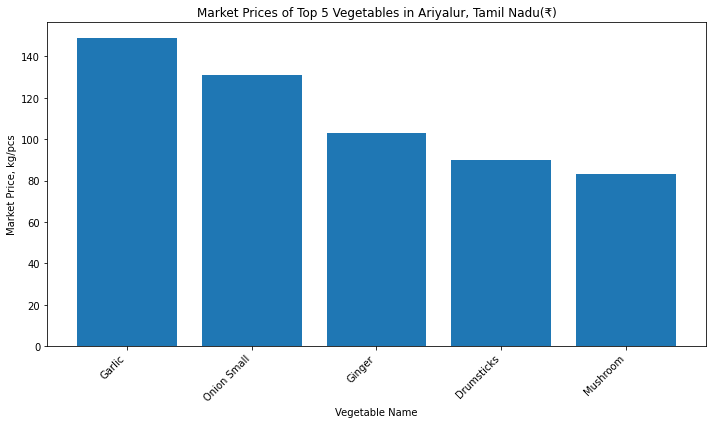

            State      District Vegetable Name  Market Price
29513  Tamil Nadu  Chengalpattu         Garlic           146
29526  Tamil Nadu  Chengalpattu    Onion Small           136
29514  Tamil Nadu  Chengalpattu         Ginger           102
29517  Tamil Nadu  Chengalpattu     Green peas            82
29507  Tamil Nadu  Chengalpattu     Drumsticks            80


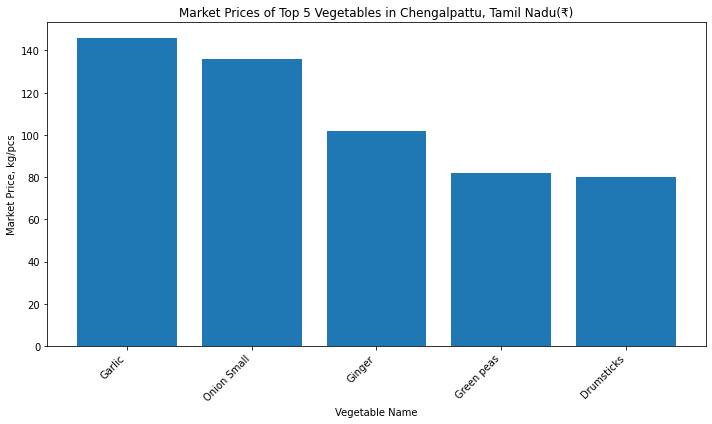

            State District Vegetable Name  Market Price
29567  Tamil Nadu  Chennai         Garlic           157
29580  Tamil Nadu  Chennai    Onion Small           121
29568  Tamil Nadu  Chennai         Ginger            95
29539  Tamil Nadu  Chennai           Amla            80
29561  Tamil Nadu  Chennai     Drumsticks            80


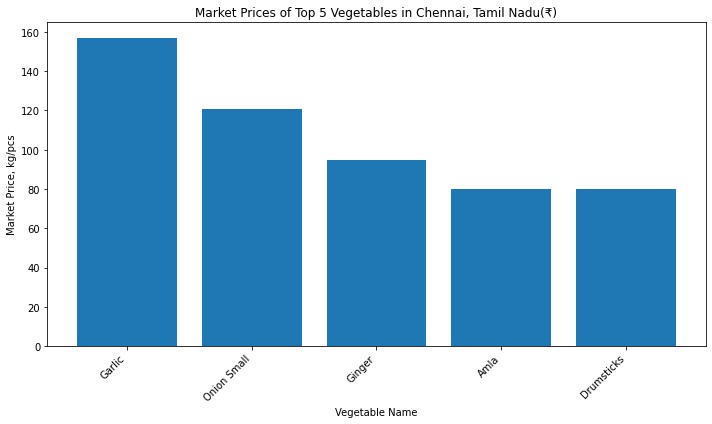

            State    District Vegetable Name  Market Price
29621  Tamil Nadu  Coimbatore         Garlic           150
29634  Tamil Nadu  Coimbatore    Onion Small           129
29593  Tamil Nadu  Coimbatore           Amla            95
29622  Tamil Nadu  Coimbatore         Ginger            93
29625  Tamil Nadu  Coimbatore     Green peas            85


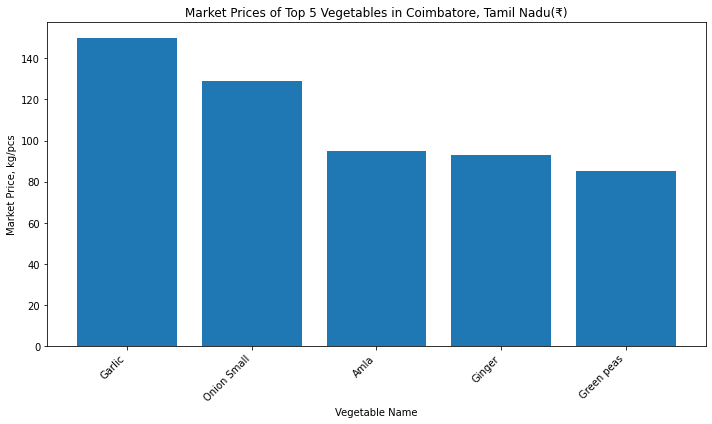

            State   District Vegetable Name  Market Price
29675  Tamil Nadu  Cuddalore         Garlic           151
29688  Tamil Nadu  Cuddalore    Onion Small           121
29676  Tamil Nadu  Cuddalore         Ginger           104
29684  Tamil Nadu  Cuddalore       Mushroom            91
29669  Tamil Nadu  Cuddalore     Drumsticks            90


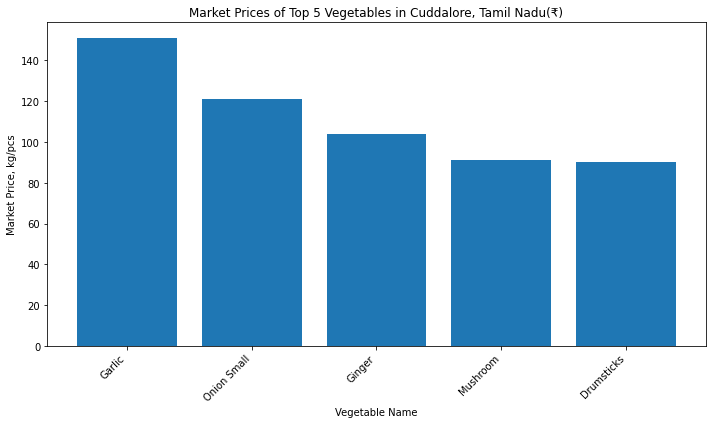

            State    District Vegetable Name  Market Price
29729  Tamil Nadu  Dharmapuri         Garlic           148
29742  Tamil Nadu  Dharmapuri    Onion Small           129
29730  Tamil Nadu  Dharmapuri         Ginger            94
29723  Tamil Nadu  Dharmapuri     Drumsticks            90
29738  Tamil Nadu  Dharmapuri       Mushroom            79


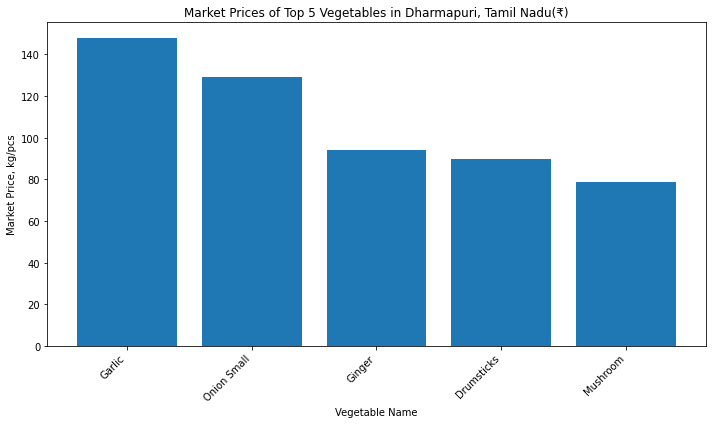

            State  District Vegetable Name  Market Price
29783  Tamil Nadu  Dindigul         Garlic           156
29796  Tamil Nadu  Dindigul    Onion Small           130
29784  Tamil Nadu  Dindigul         Ginger            97
29755  Tamil Nadu  Dindigul           Amla            90
29787  Tamil Nadu  Dindigul     Green peas            83


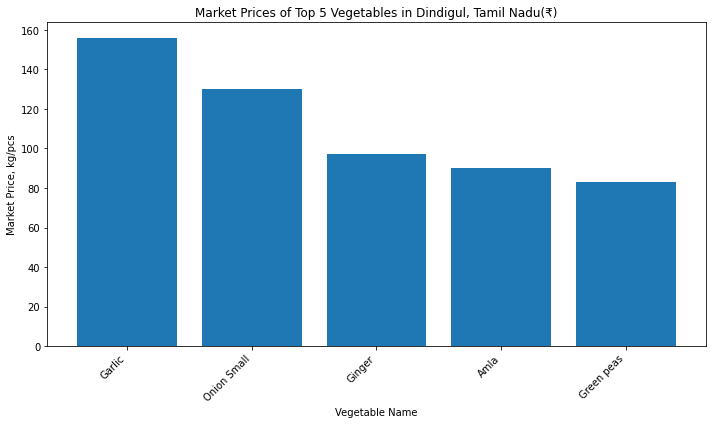

            State District Vegetable Name  Market Price
29850  Tamil Nadu    Erode    Onion Small           140
29837  Tamil Nadu    Erode         Garlic           135
29838  Tamil Nadu    Erode         Ginger           100
29831  Tamil Nadu    Erode     Drumsticks            90
29809  Tamil Nadu    Erode           Amla            85


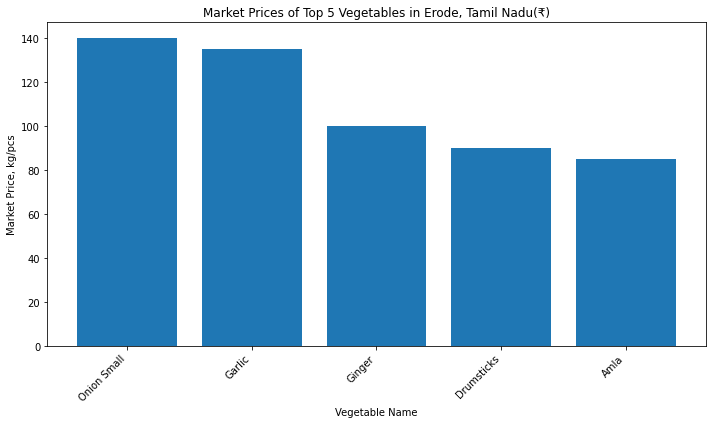

            State District Vegetable Name  Market Price
29891  Tamil Nadu    Hosur         Garlic           134
29904  Tamil Nadu    Hosur    Onion Small           124
29892  Tamil Nadu    Hosur         Ginger           101
29863  Tamil Nadu    Hosur           Amla            95
29885  Tamil Nadu    Hosur     Drumsticks            90


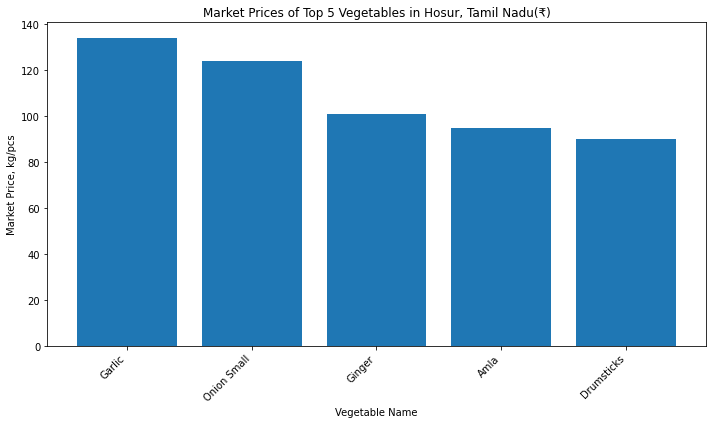

            State      District Vegetable Name  Market Price
29958  Tamil Nadu  Kallakurichi    Onion Small           135
29945  Tamil Nadu  Kallakurichi         Garlic           134
29946  Tamil Nadu  Kallakurichi         Ginger           109
29917  Tamil Nadu  Kallakurichi           Amla            95
29939  Tamil Nadu  Kallakurichi     Drumsticks            80


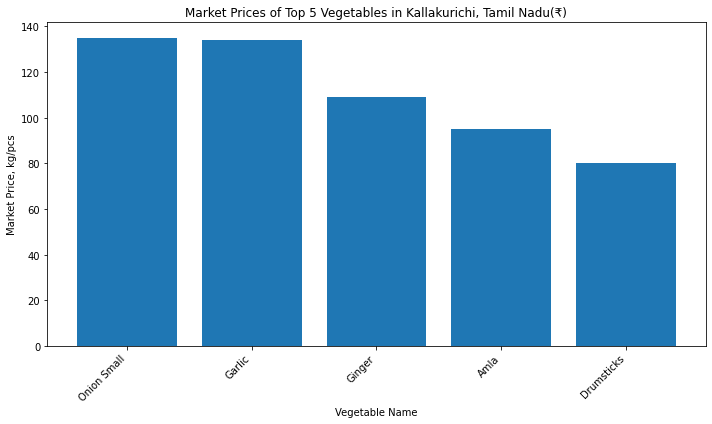

            State     District Vegetable Name  Market Price
29999  Tamil Nadu  Kanchipuram         Garlic           151
30012  Tamil Nadu  Kanchipuram    Onion Small           121
30008  Tamil Nadu  Kanchipuram       Mushroom            95
30000  Tamil Nadu  Kanchipuram         Ginger            94
29971  Tamil Nadu  Kanchipuram           Amla            80


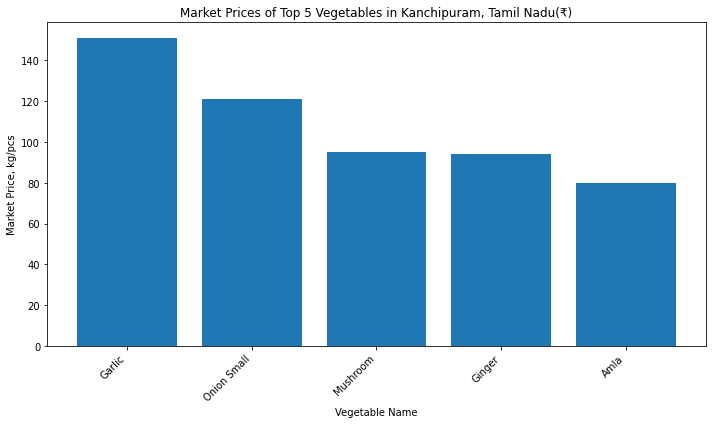

            State District Vegetable Name  Market Price
30053  Tamil Nadu    Karur         Garlic           145
30066  Tamil Nadu    Karur    Onion Small           122
30054  Tamil Nadu    Karur         Ginger            98
30025  Tamil Nadu    Karur           Amla            95
30057  Tamil Nadu    Karur     Green peas            83


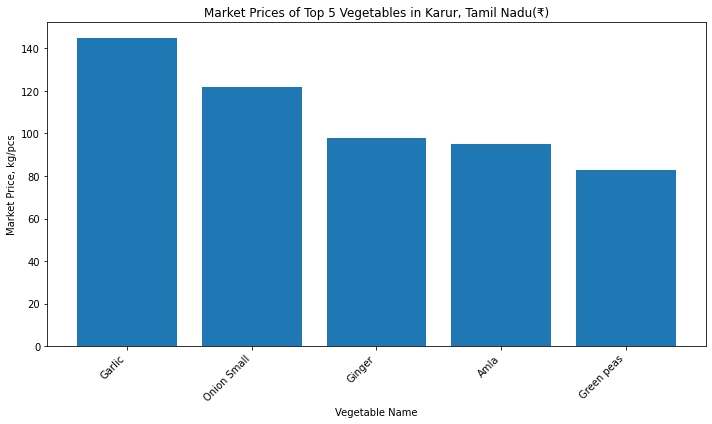

            State     District Vegetable Name  Market Price
30107  Tamil Nadu  Krishnagiri         Garlic           156
30120  Tamil Nadu  Krishnagiri    Onion Small           130
30108  Tamil Nadu  Krishnagiri         Ginger            93
30101  Tamil Nadu  Krishnagiri     Drumsticks            90
30111  Tamil Nadu  Krishnagiri     Green peas            84


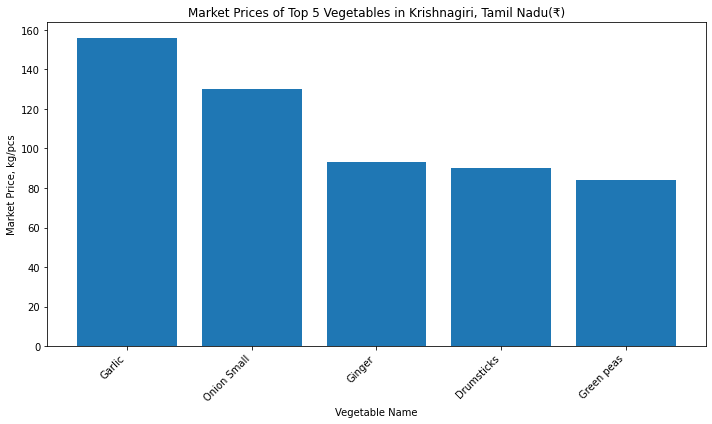

            State District Vegetable Name  Market Price
30161  Tamil Nadu  Madurai         Garlic           138
30174  Tamil Nadu  Madurai    Onion Small           132
30162  Tamil Nadu  Madurai         Ginger           108
30170  Tamil Nadu  Madurai       Mushroom            92
30155  Tamil Nadu  Madurai     Drumsticks            90


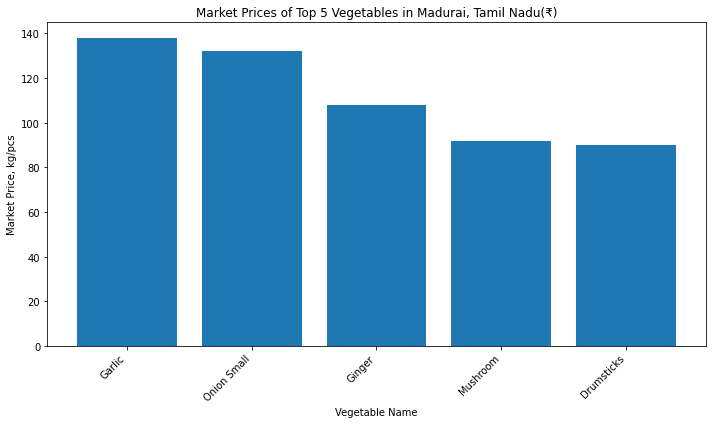

            State        District Vegetable Name  Market Price
30215  Tamil Nadu  Mayiladuthurai         Garlic           156
30228  Tamil Nadu  Mayiladuthurai    Onion Small           132
30216  Tamil Nadu  Mayiladuthurai         Ginger           102
30187  Tamil Nadu  Mayiladuthurai           Amla            95
30209  Tamil Nadu  Mayiladuthurai     Drumsticks            90


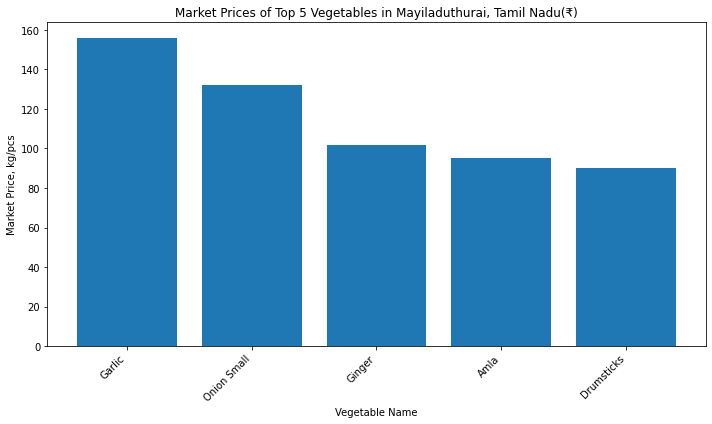

            State      District Vegetable Name  Market Price
30269  Tamil Nadu  Nagapattinam         Garlic           150
30282  Tamil Nadu  Nagapattinam    Onion Small           137
30270  Tamil Nadu  Nagapattinam         Ginger            97
30278  Tamil Nadu  Nagapattinam       Mushroom            92
30273  Tamil Nadu  Nagapattinam     Green peas            81


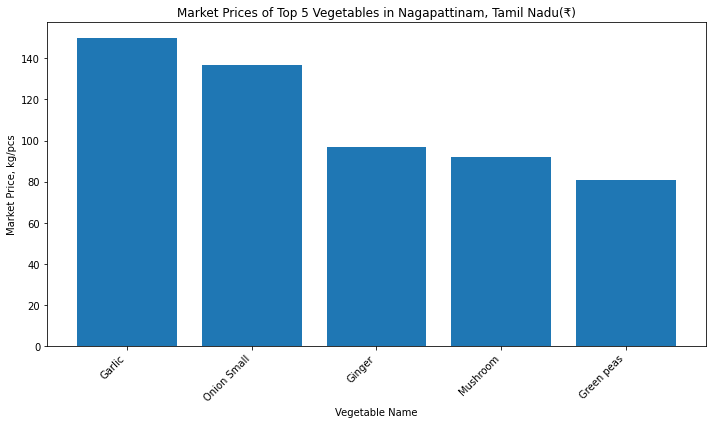

            State   District Vegetable Name  Market Price
30323  Tamil Nadu  Nagercoil         Garlic           151
30336  Tamil Nadu  Nagercoil    Onion Small           137
30324  Tamil Nadu  Nagercoil         Ginger            99
30295  Tamil Nadu  Nagercoil           Amla            90
30332  Tamil Nadu  Nagercoil       Mushroom            85


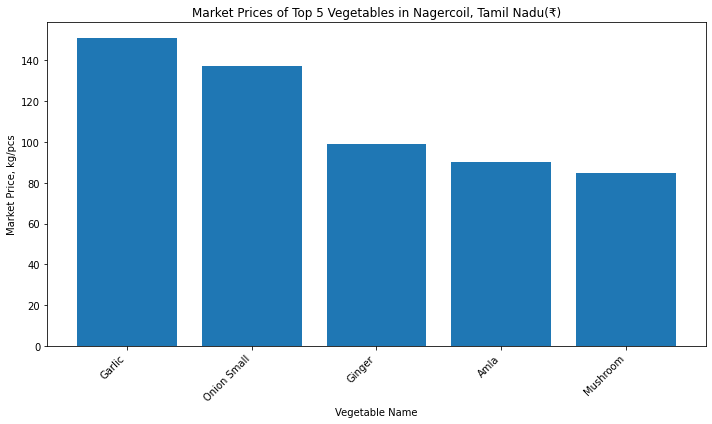

            State  District Vegetable Name  Market Price
30377  Tamil Nadu  Namakkal         Garlic           133
30390  Tamil Nadu  Namakkal    Onion Small           124
30378  Tamil Nadu  Namakkal         Ginger            99
30386  Tamil Nadu  Namakkal       Mushroom            92
30381  Tamil Nadu  Namakkal     Green peas            83


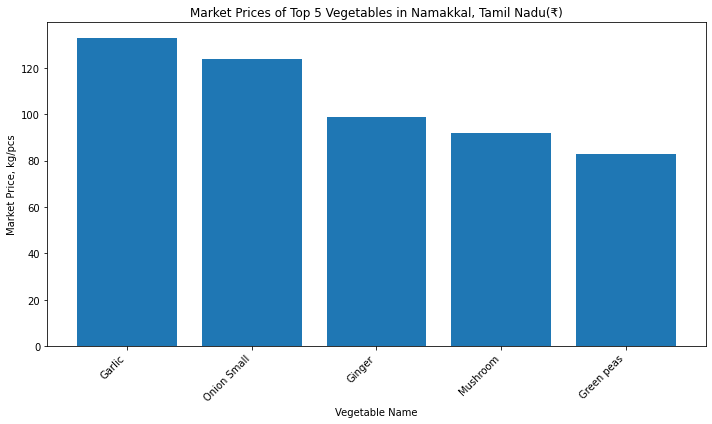

            State    District Vegetable Name  Market Price
30431  Tamil Nadu  Perambalur         Garlic           155
30444  Tamil Nadu  Perambalur    Onion Small           132
30432  Tamil Nadu  Perambalur         Ginger           105
30440  Tamil Nadu  Perambalur       Mushroom            91
30425  Tamil Nadu  Perambalur     Drumsticks            90


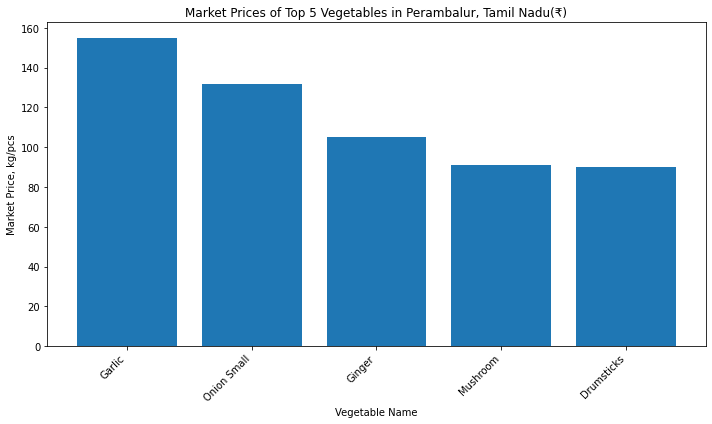

            State     District Vegetable Name  Market Price
30485  Tamil Nadu  Pudukkottai         Garlic           153
30498  Tamil Nadu  Pudukkottai    Onion Small           129
30486  Tamil Nadu  Pudukkottai         Ginger           100
30479  Tamil Nadu  Pudukkottai     Drumsticks            90
30457  Tamil Nadu  Pudukkottai           Amla            80


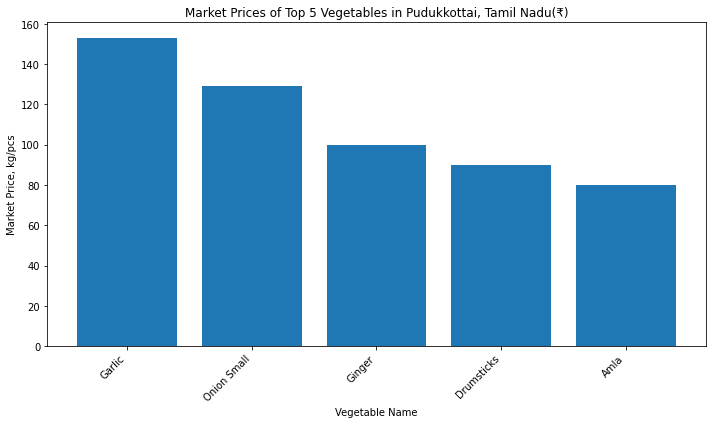

            State        District Vegetable Name  Market Price
30552  Tamil Nadu  Ramanathapuram    Onion Small           139
30539  Tamil Nadu  Ramanathapuram         Garlic           134
30540  Tamil Nadu  Ramanathapuram         Ginger            95
30533  Tamil Nadu  Ramanathapuram     Drumsticks            90
30548  Tamil Nadu  Ramanathapuram       Mushroom            87


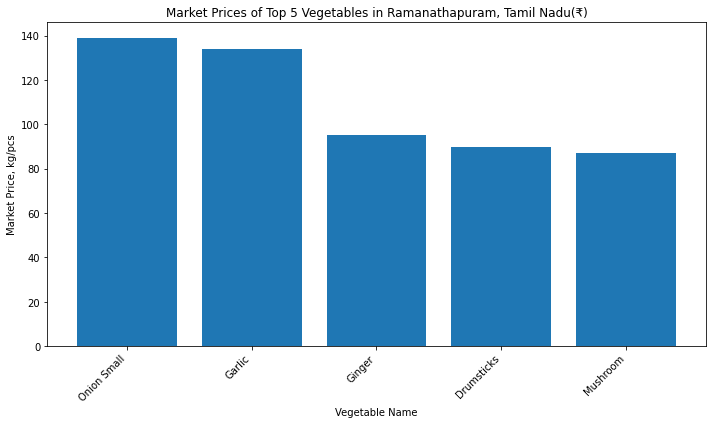

            State District Vegetable Name  Market Price
30593  Tamil Nadu  Ranipet         Garlic           154
30606  Tamil Nadu  Ranipet    Onion Small           120
30594  Tamil Nadu  Ranipet         Ginger           100
30565  Tamil Nadu  Ranipet           Amla            90
30602  Tamil Nadu  Ranipet       Mushroom            86


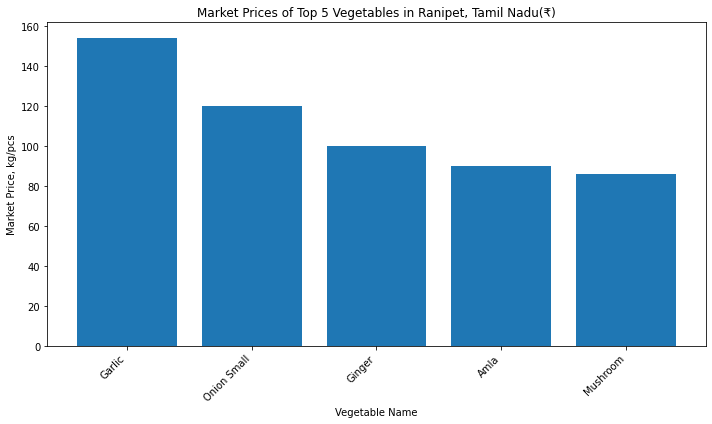

            State District Vegetable Name  Market Price
30647  Tamil Nadu    Salem         Garlic           136
30660  Tamil Nadu    Salem    Onion Small           121
30648  Tamil Nadu    Salem         Ginger            93
30656  Tamil Nadu    Salem       Mushroom            87
30641  Tamil Nadu    Salem     Drumsticks            80


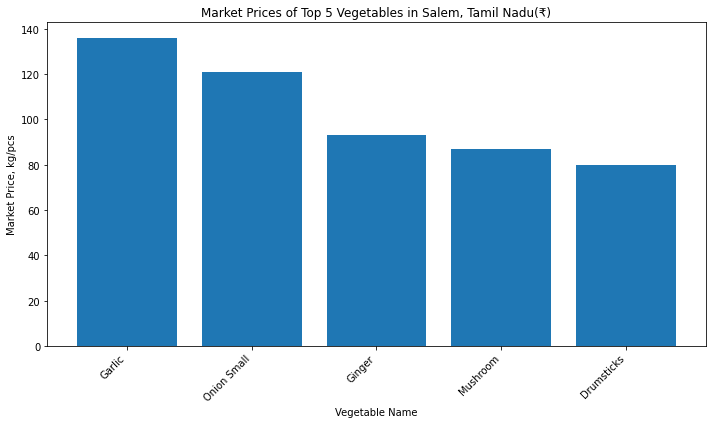

            State   District Vegetable Name  Market Price
30701  Tamil Nadu  Sivaganga         Garlic           155
30714  Tamil Nadu  Sivaganga    Onion Small           134
30673  Tamil Nadu  Sivaganga           Amla            95
30702  Tamil Nadu  Sivaganga         Ginger            91
30695  Tamil Nadu  Sivaganga     Drumsticks            90


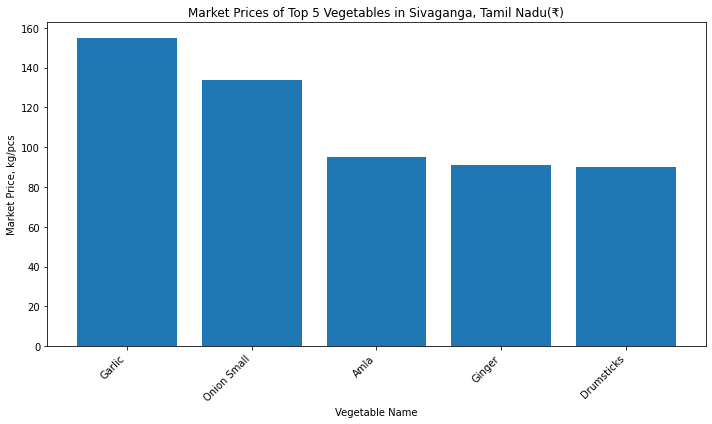

            State District Vegetable Name  Market Price
30755  Tamil Nadu  Tenkasi         Garlic           141
30768  Tamil Nadu  Tenkasi    Onion Small           135
30756  Tamil Nadu  Tenkasi         Ginger           103
30749  Tamil Nadu  Tenkasi     Drumsticks            90
30764  Tamil Nadu  Tenkasi       Mushroom            80


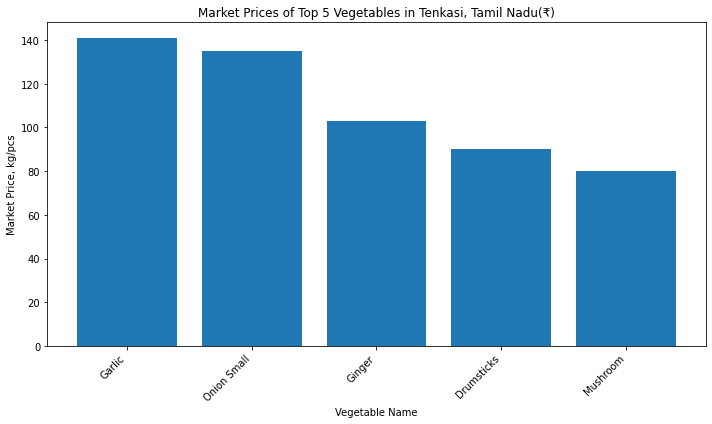

            State   District Vegetable Name  Market Price
30822  Tamil Nadu  Thanjavur    Onion Small           139
30809  Tamil Nadu  Thanjavur         Garlic           132
30810  Tamil Nadu  Thanjavur         Ginger           105
30803  Tamil Nadu  Thanjavur     Drumsticks            90
30813  Tamil Nadu  Thanjavur     Green peas            85


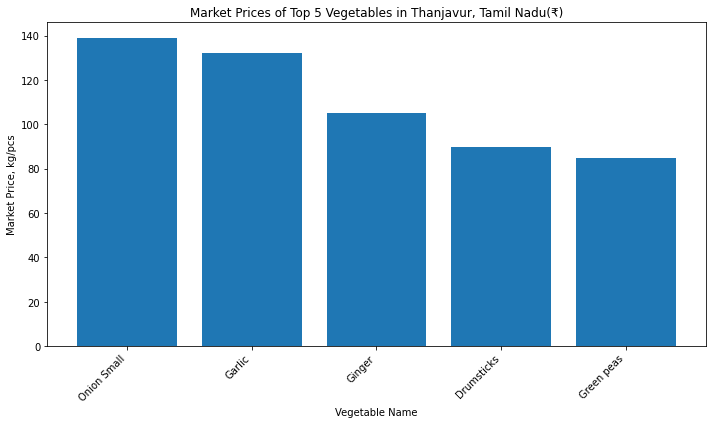

            State District Vegetable Name  Market Price
30863  Tamil Nadu    Theni         Garlic           140
30876  Tamil Nadu    Theni    Onion Small           140
30864  Tamil Nadu    Theni         Ginger            97
30835  Tamil Nadu    Theni           Amla            95
30857  Tamil Nadu    Theni     Drumsticks            90


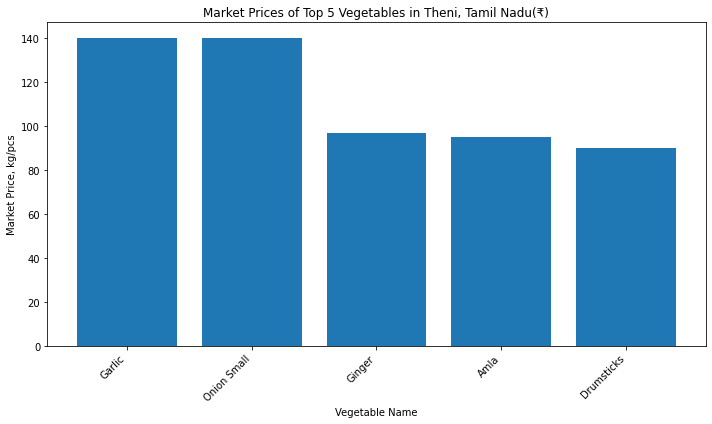

            State     District Vegetable Name  Market Price
30917  Tamil Nadu  Thoothukudi         Garlic           146
30930  Tamil Nadu  Thoothukudi    Onion Small           139
30918  Tamil Nadu  Thoothukudi         Ginger           107
30911  Tamil Nadu  Thoothukudi     Drumsticks            90
30921  Tamil Nadu  Thoothukudi     Green peas            85


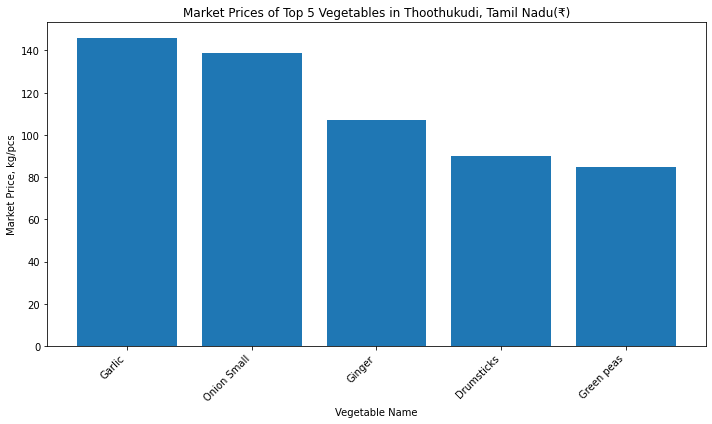

            State                 District Vegetable Name  Market Price
30971  Tamil Nadu  Thoothukudi (Tuticorin)         Garlic           160
30984  Tamil Nadu  Thoothukudi (Tuticorin)    Onion Small           120
30972  Tamil Nadu  Thoothukudi (Tuticorin)         Ginger            98
30965  Tamil Nadu  Thoothukudi (Tuticorin)     Drumsticks            90
30943  Tamil Nadu  Thoothukudi (Tuticorin)           Amla            80


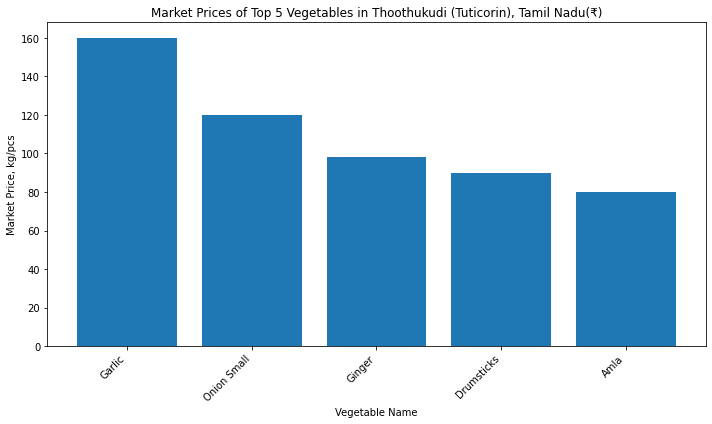

            State         District Vegetable Name  Market Price
31025  Tamil Nadu  Tiruchirappalli         Garlic           152
31038  Tamil Nadu  Tiruchirappalli    Onion Small           129
31026  Tamil Nadu  Tiruchirappalli         Ginger            95
31019  Tamil Nadu  Tiruchirappalli     Drumsticks            90
31034  Tamil Nadu  Tiruchirappalli       Mushroom            86


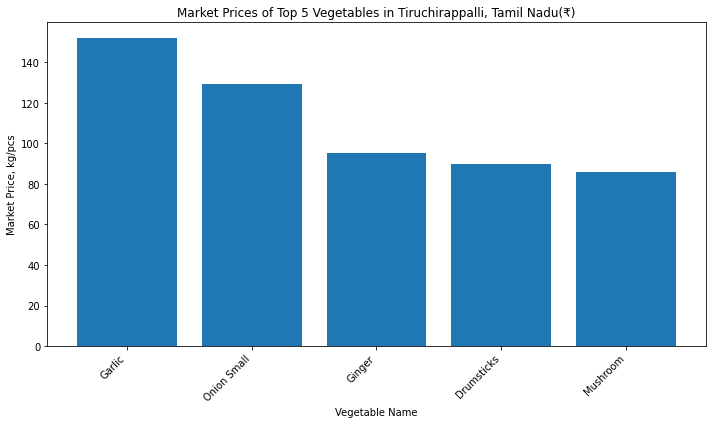

            State     District Vegetable Name  Market Price
31079  Tamil Nadu  Tirunelveli         Garlic           133
31092  Tamil Nadu  Tirunelveli    Onion Small           132
31080  Tamil Nadu  Tirunelveli         Ginger            92
31073  Tamil Nadu  Tirunelveli     Drumsticks            90
31051  Tamil Nadu  Tirunelveli           Amla            80


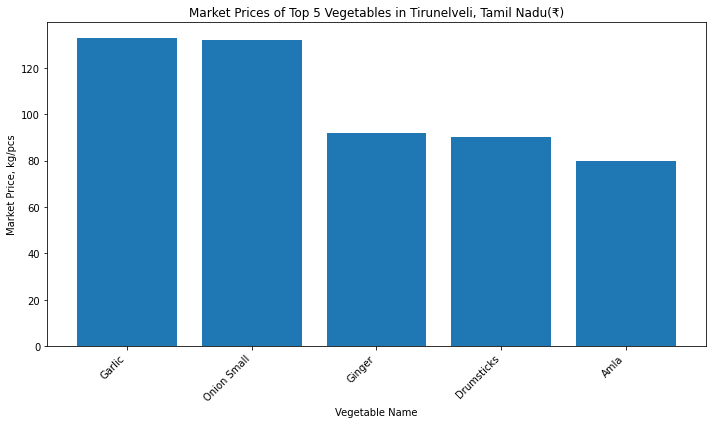

            State    District Vegetable Name  Market Price
31146  Tamil Nadu  Tirupattur    Onion Small           138
31133  Tamil Nadu  Tirupattur         Garlic           132
31134  Tamil Nadu  Tirupattur         Ginger            99
31142  Tamil Nadu  Tirupattur       Mushroom            91
31127  Tamil Nadu  Tirupattur     Drumsticks            80


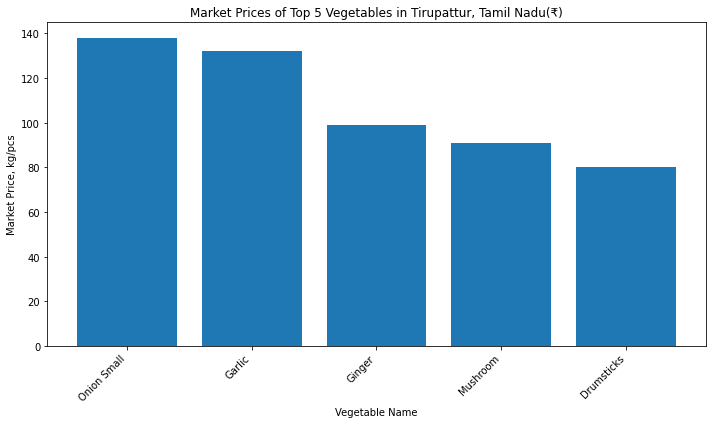

            State District Vegetable Name  Market Price
31187  Tamil Nadu  Tirupur         Garlic           157
31200  Tamil Nadu  Tirupur    Onion Small           131
31188  Tamil Nadu  Tirupur         Ginger            90
31181  Tamil Nadu  Tirupur     Drumsticks            90
31196  Tamil Nadu  Tirupur       Mushroom            87


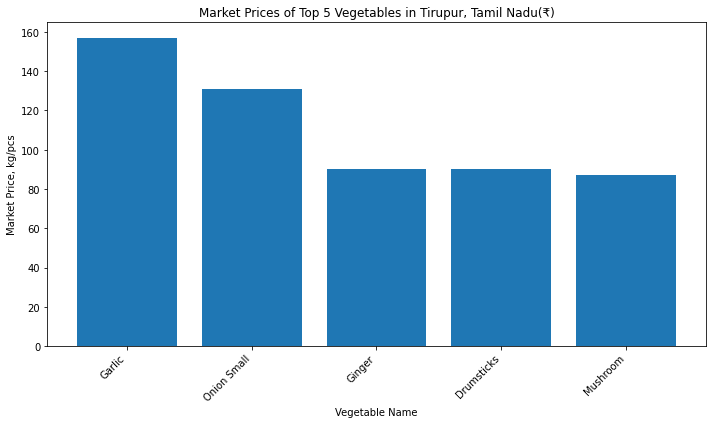

            State    District Vegetable Name  Market Price
31241  Tamil Nadu  Tiruvallur         Garlic           155
31254  Tamil Nadu  Tiruvallur    Onion Small           131
31250  Tamil Nadu  Tiruvallur       Mushroom            95
31242  Tamil Nadu  Tiruvallur         Ginger            91
31235  Tamil Nadu  Tiruvallur     Drumsticks            90


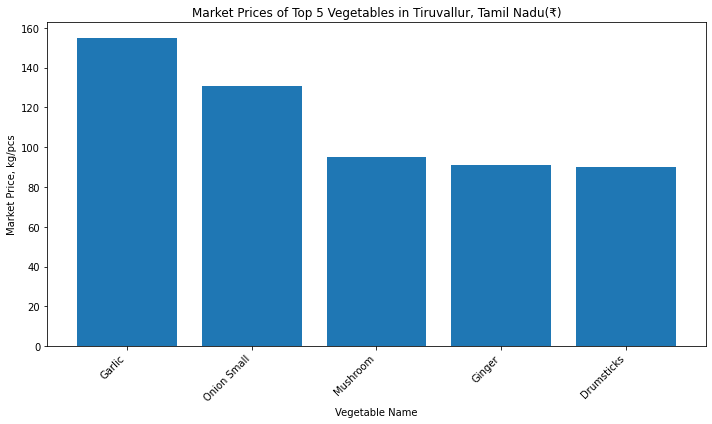

            State         District Vegetable Name  Market Price
31295  Tamil Nadu  Tiruvannaamalai         Garlic           140
31308  Tamil Nadu  Tiruvannaamalai    Onion Small           128
31296  Tamil Nadu  Tiruvannaamalai         Ginger            94
31267  Tamil Nadu  Tiruvannaamalai           Amla            90
31289  Tamil Nadu  Tiruvannaamalai     Drumsticks            80


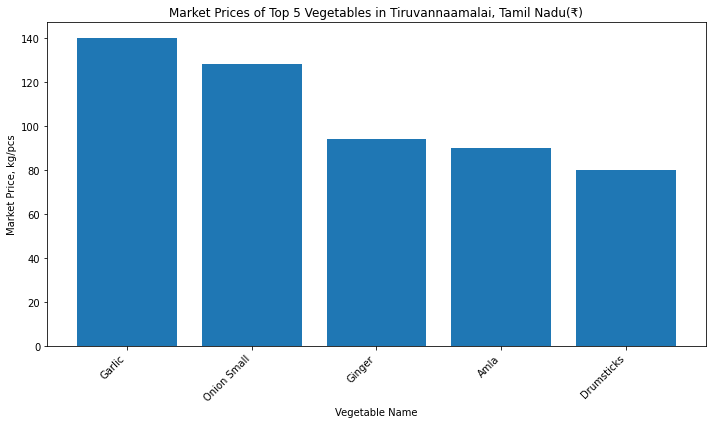

            State   District Vegetable Name  Market Price
31349  Tamil Nadu  Tiruvarur         Garlic           155
31362  Tamil Nadu  Tiruvarur    Onion Small           126
31350  Tamil Nadu  Tiruvarur         Ginger           105
31321  Tamil Nadu  Tiruvarur           Amla            95
31353  Tamil Nadu  Tiruvarur     Green peas            82


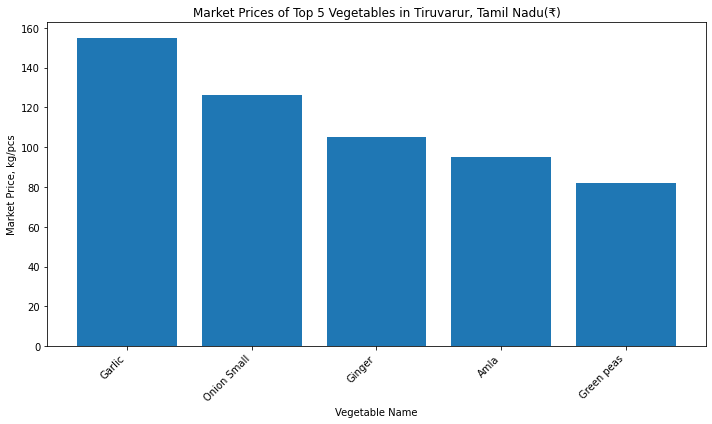

            State              District Vegetable Name  Market Price
31403  Tamil Nadu  Udagamandalam (Ooty)         Garlic           160
31416  Tamil Nadu  Udagamandalam (Ooty)    Onion Small           132
31375  Tamil Nadu  Udagamandalam (Ooty)           Amla            95
31404  Tamil Nadu  Udagamandalam (Ooty)         Ginger            94
31412  Tamil Nadu  Udagamandalam (Ooty)       Mushroom            85


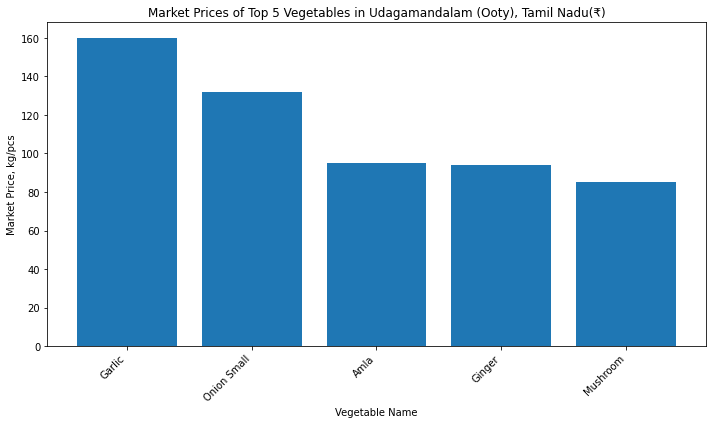

            State District Vegetable Name  Market Price
31457  Tamil Nadu  Vellore         Garlic           151
31470  Tamil Nadu  Vellore    Onion Small           137
31458  Tamil Nadu  Vellore         Ginger           104
31451  Tamil Nadu  Vellore     Drumsticks            90
31461  Tamil Nadu  Vellore     Green peas            81


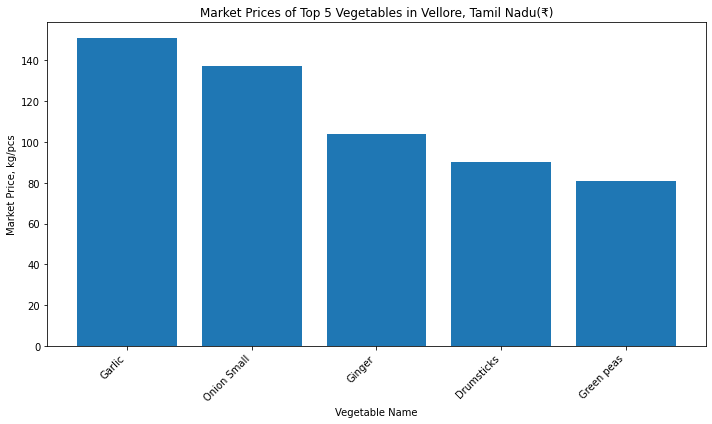

            State    District Vegetable Name  Market Price
31511  Tamil Nadu  Viluppuram         Garlic           143
31524  Tamil Nadu  Viluppuram    Onion Small           134
31512  Tamil Nadu  Viluppuram         Ginger            95
31505  Tamil Nadu  Viluppuram     Drumsticks            80
31515  Tamil Nadu  Viluppuram     Green peas            78


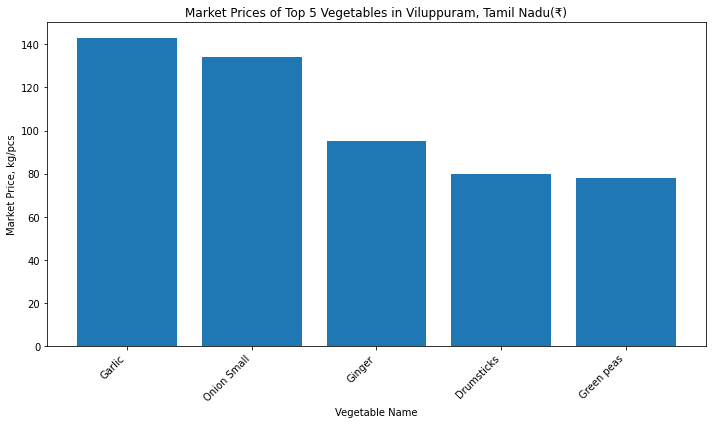

            State      District Vegetable Name  Market Price
31565  Tamil Nadu  Virudhunagar         Garlic           145
31578  Tamil Nadu  Virudhunagar    Onion Small           135
31566  Tamil Nadu  Virudhunagar         Ginger           103
31537  Tamil Nadu  Virudhunagar           Amla            85
31569  Tamil Nadu  Virudhunagar     Green peas            82


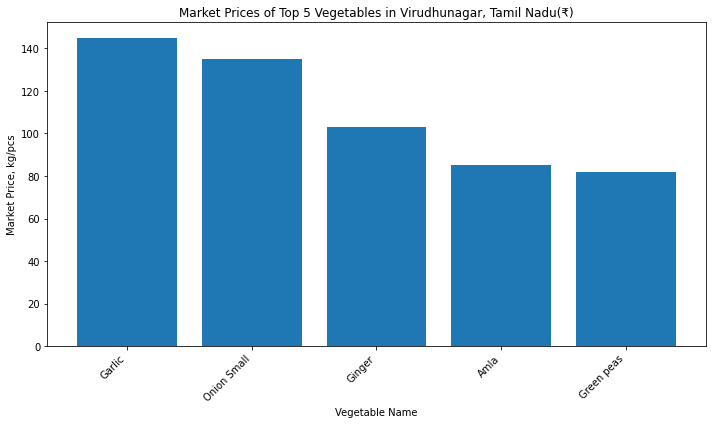

In [49]:

# Filter the data for Chennai, Tamil nadu
Tamilnadu_data = veg_data[veg_data['State'] == 'Tamil Nadu']

# Get unique district names
district_names = Tamilnadu_data['District'].unique()

# Print the district names
for district in district_names:
    chennai_data = veg_data[veg_data['District'] == district]

    # Sort the data by Market Price in descending order and select the top 5
    top_5_vegetables = chennai_data.sort_values(by='Market Price', ascending=False).head(5)

    # Print the top 5 vegetables
    print(top_5_vegetables[['State', 'District', 'Vegetable Name', 'Market Price']])

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_5_vegetables['Vegetable Name'], top_5_vegetables['Market Price'])
    plt.xlabel('Vegetable Name')
    plt.ylabel('Market Price, kg/pcs')
    plt.title(f"Market Prices of Top 5 Vegetables in {district}, Tamil Nadu(₹)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


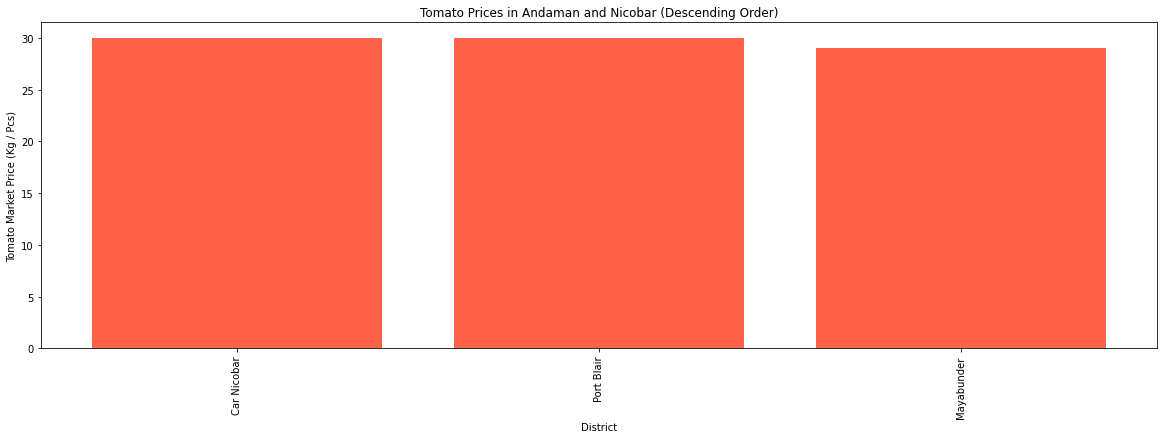

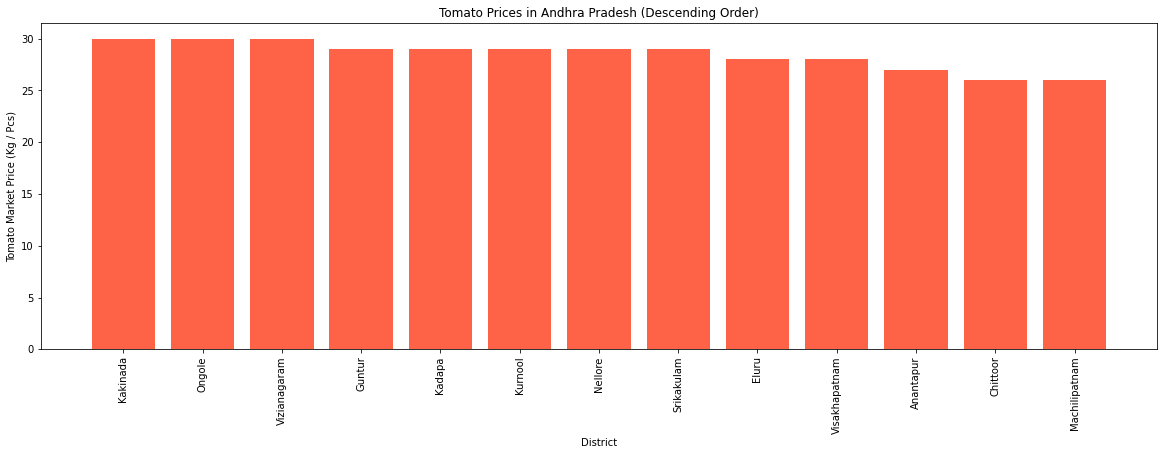

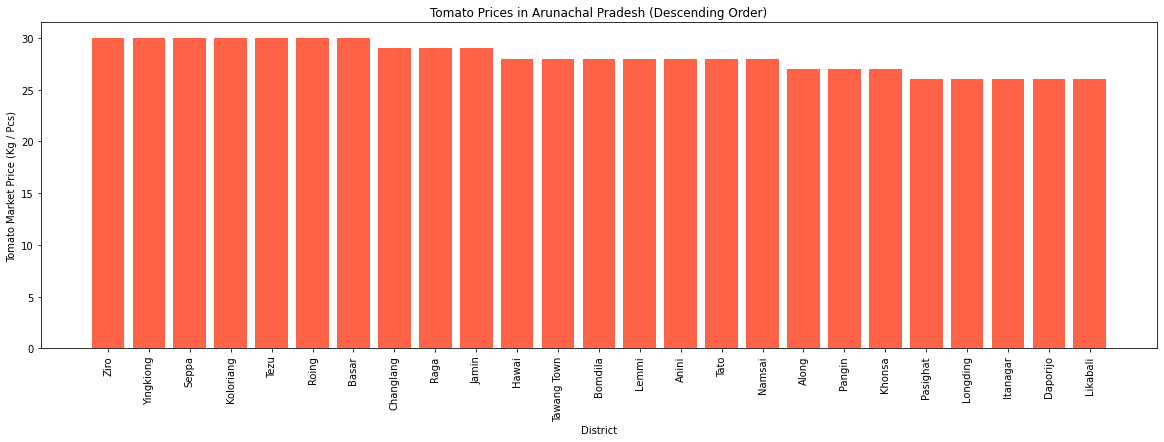

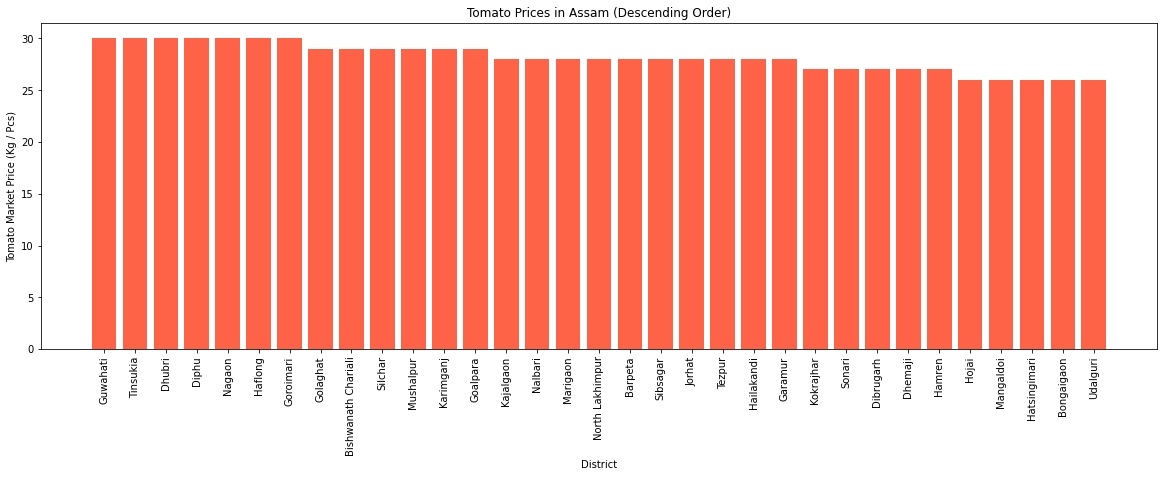

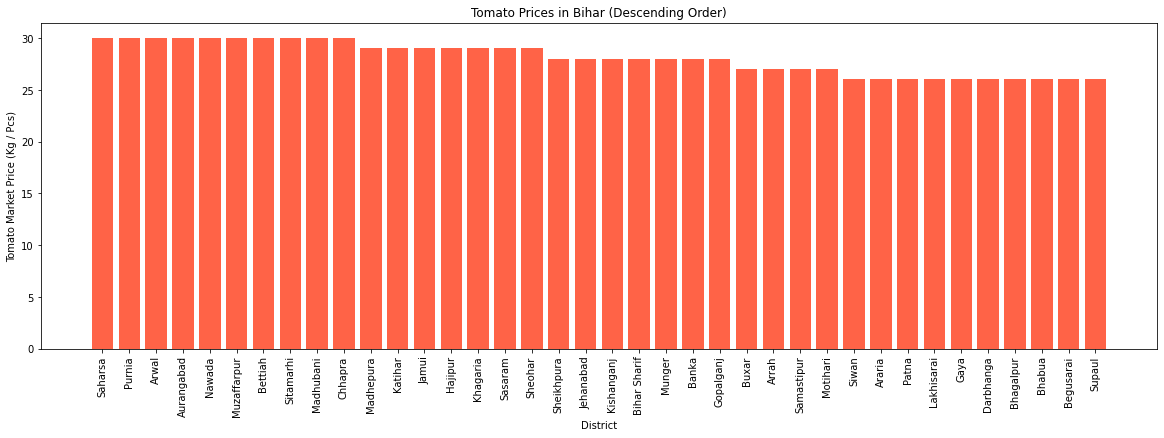

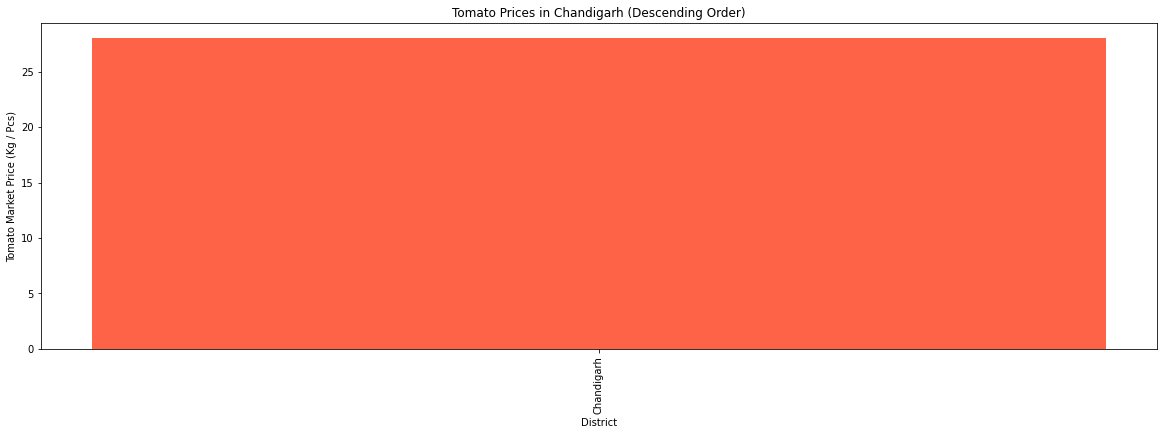

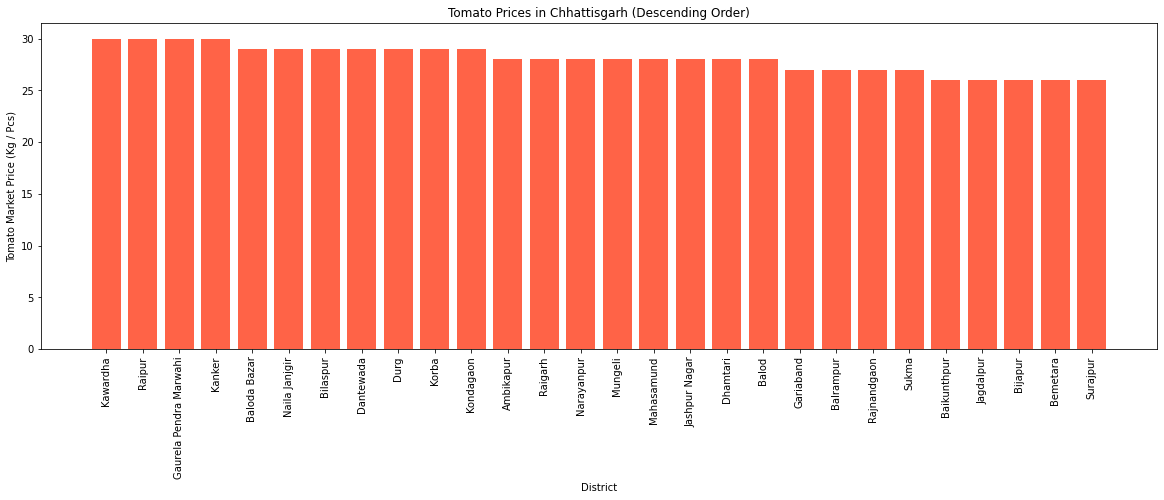

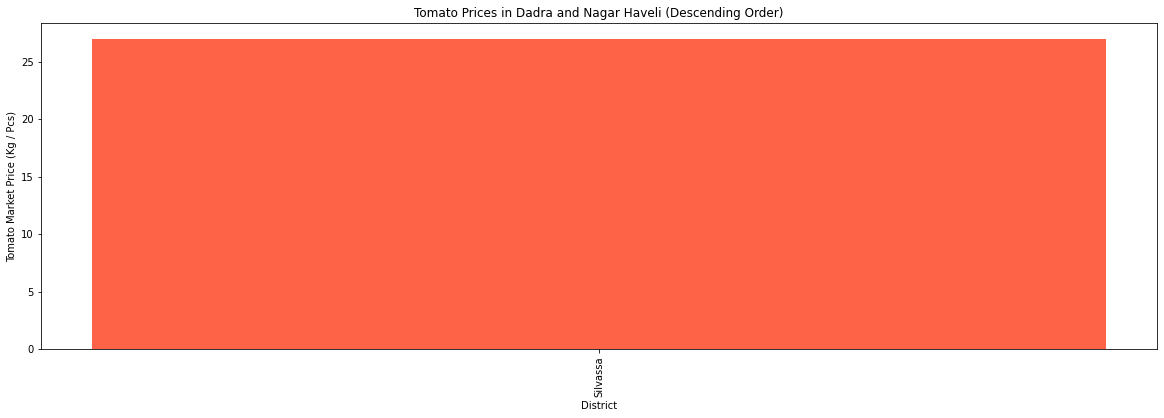

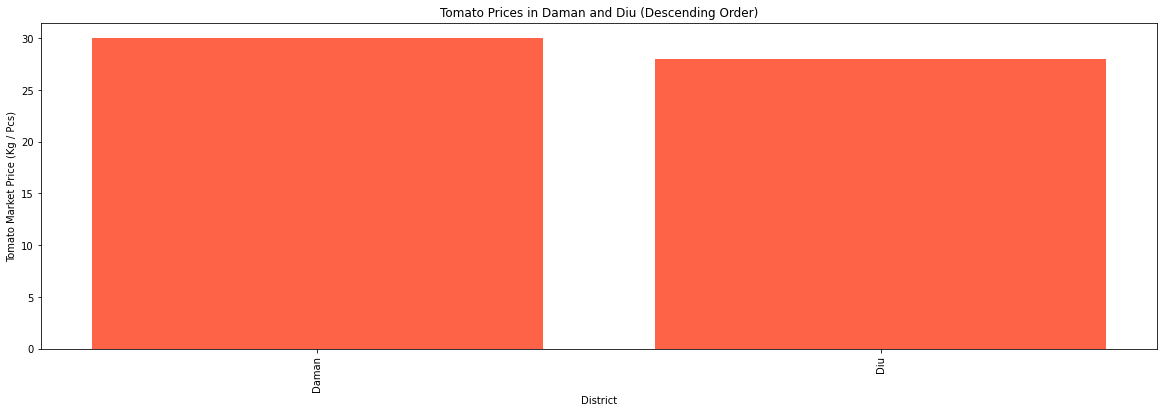

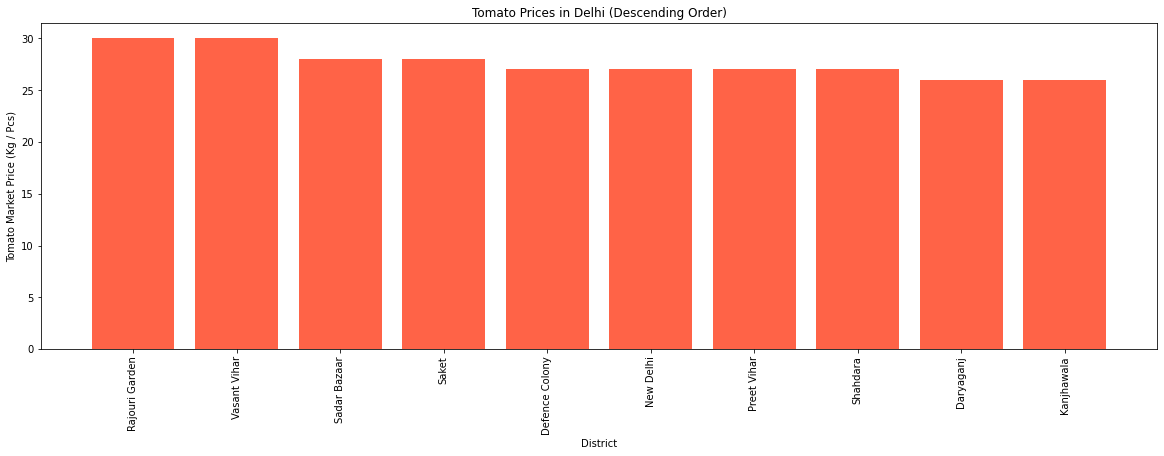

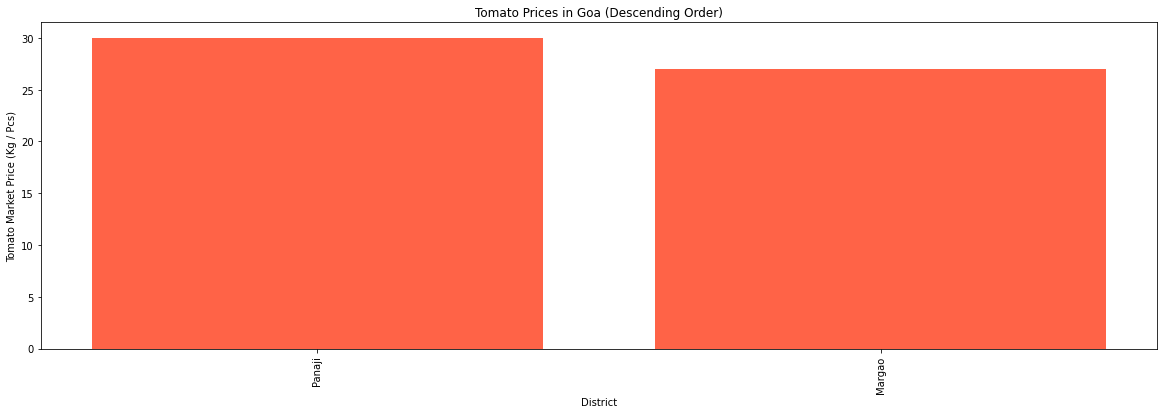

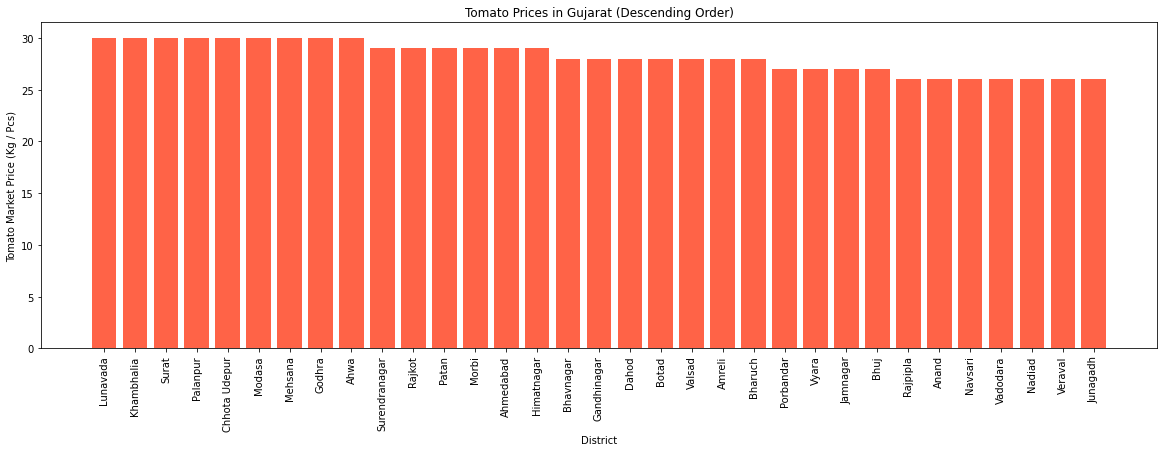

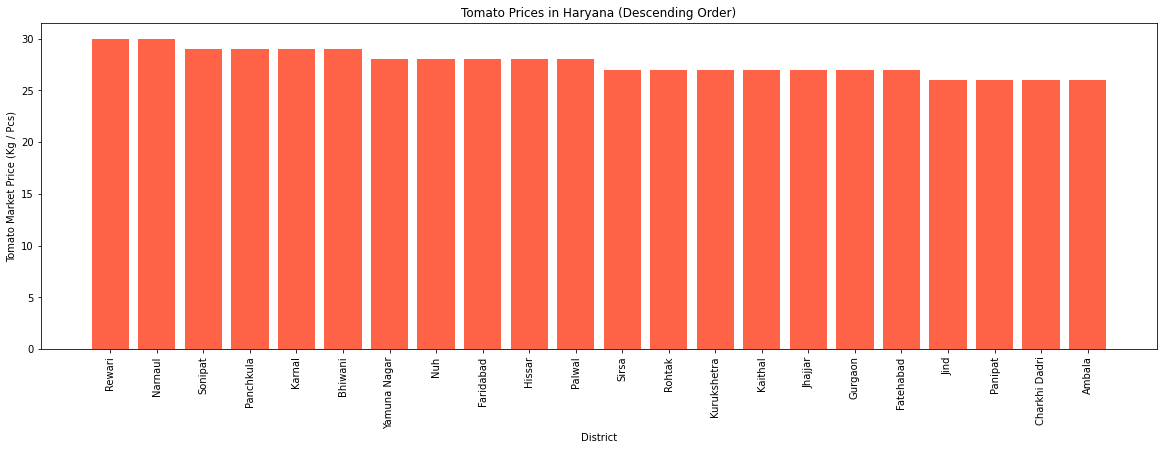

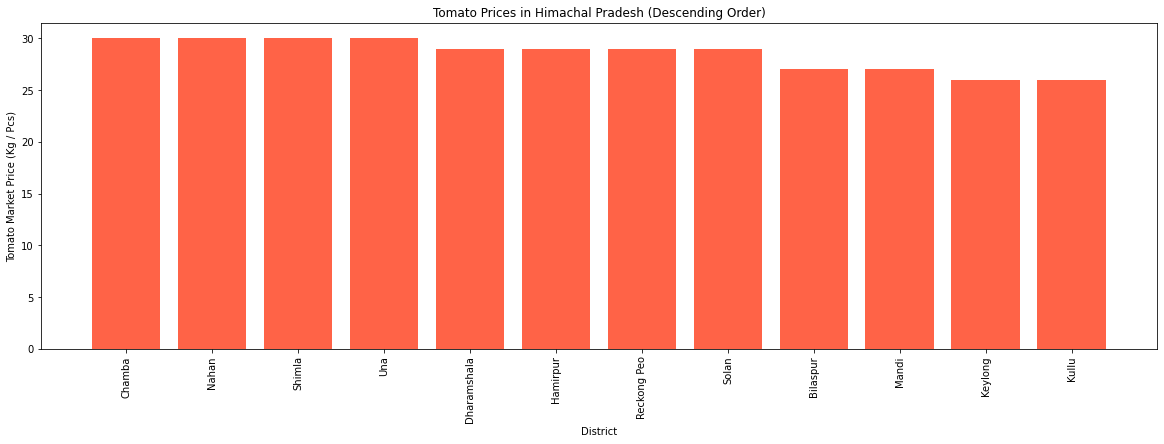

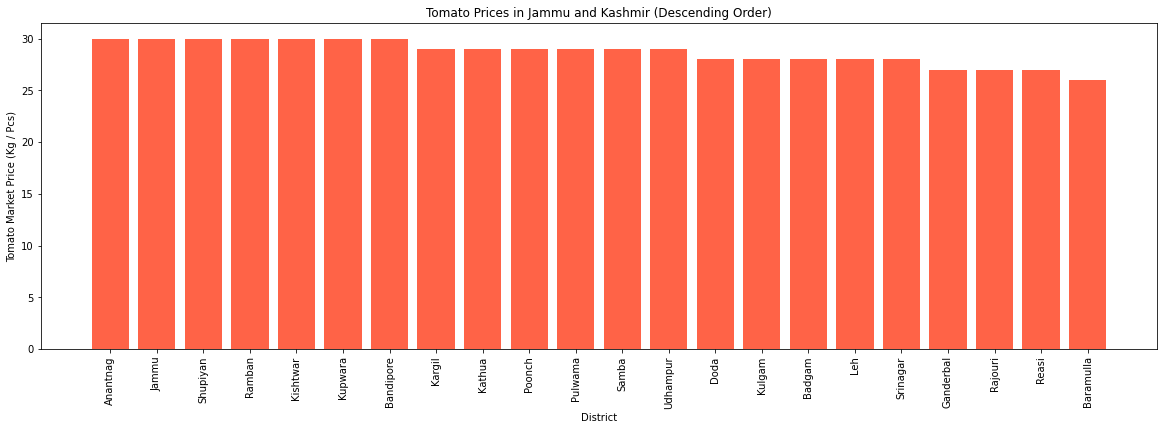

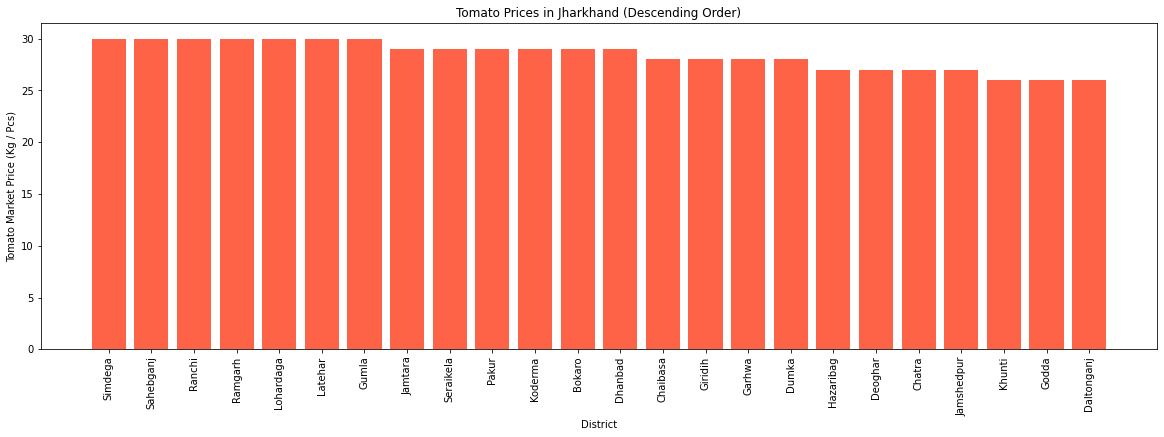

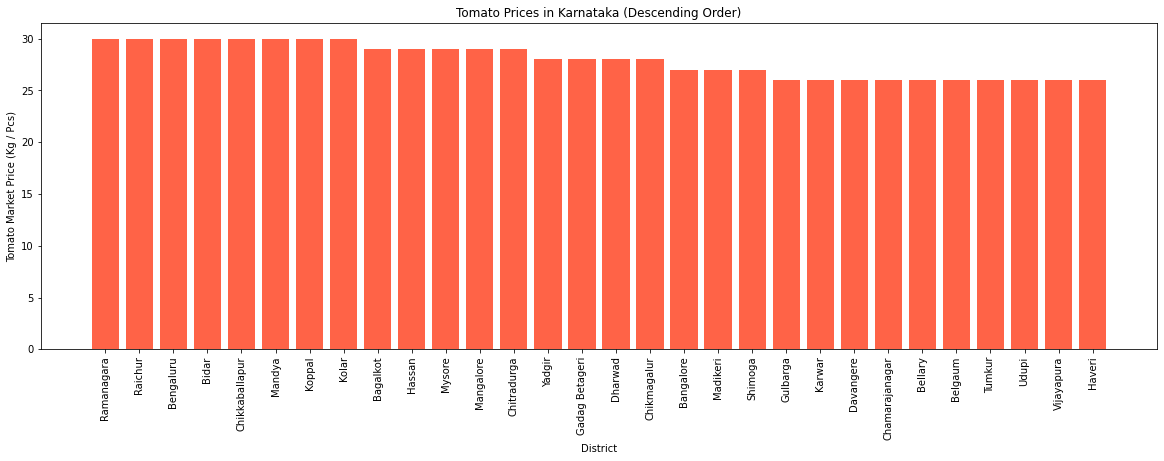

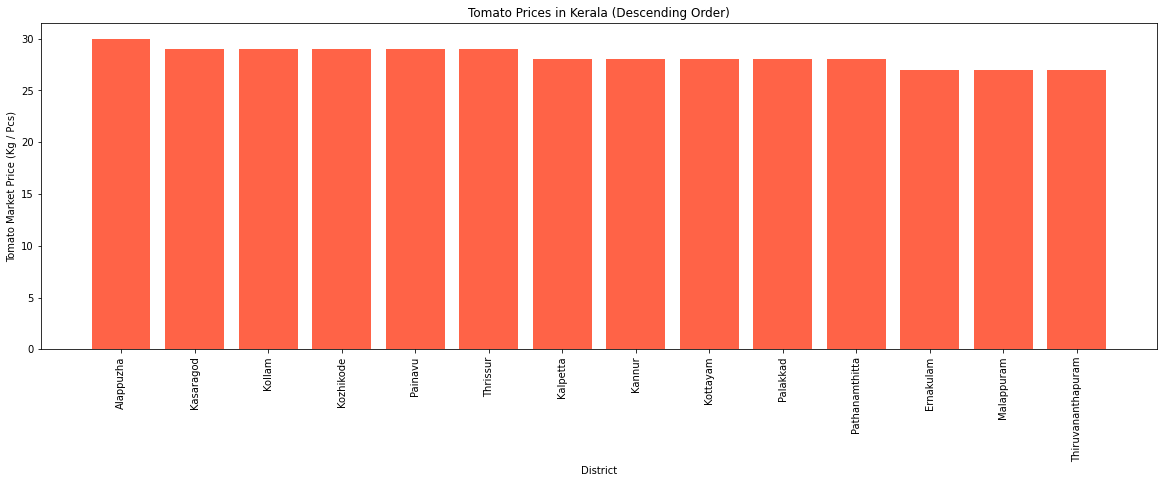

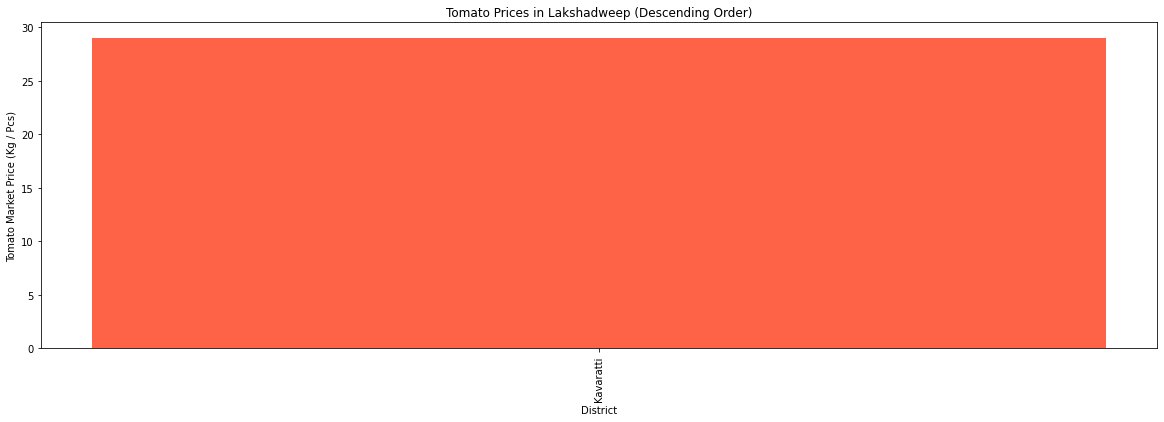

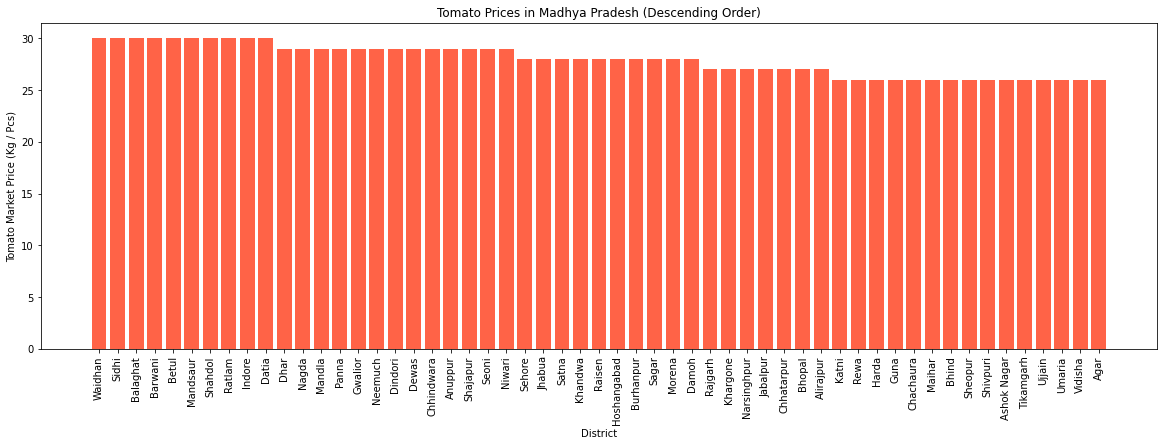

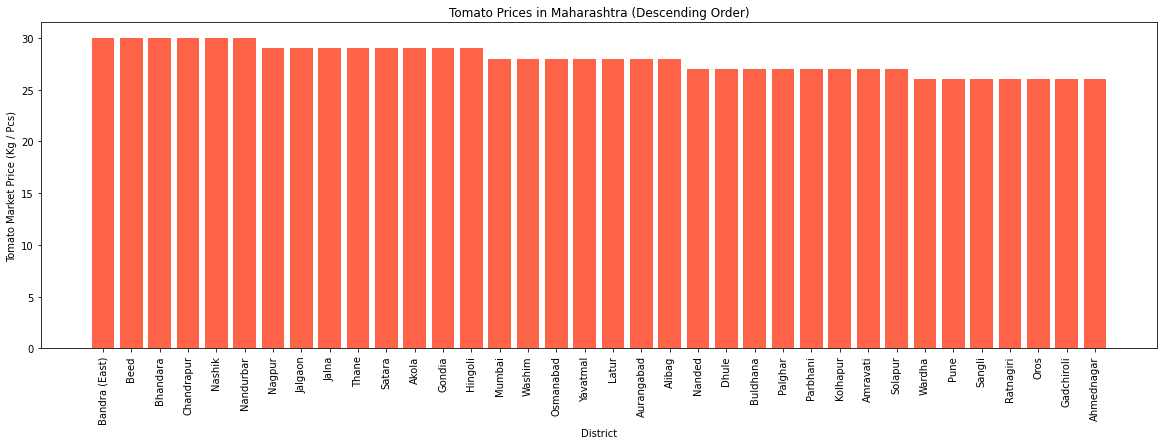

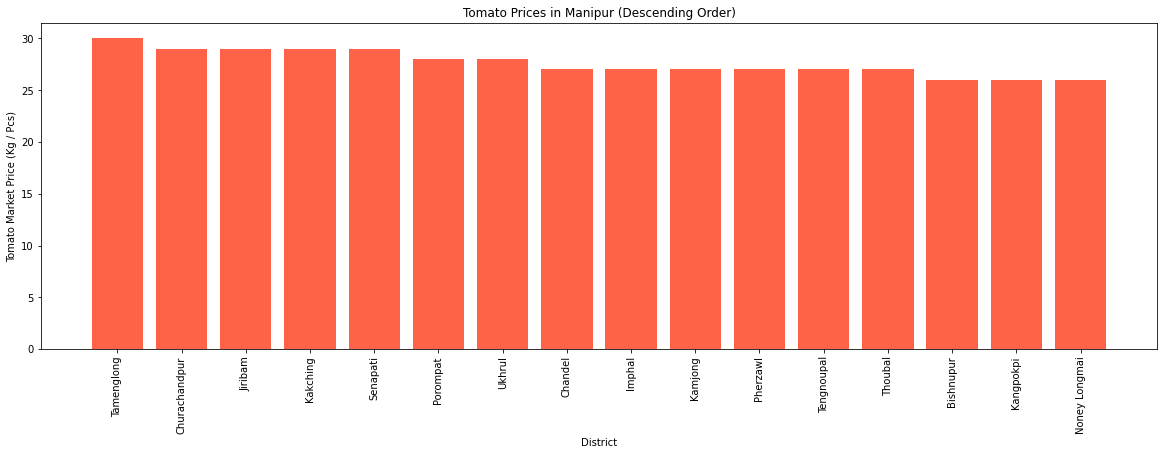

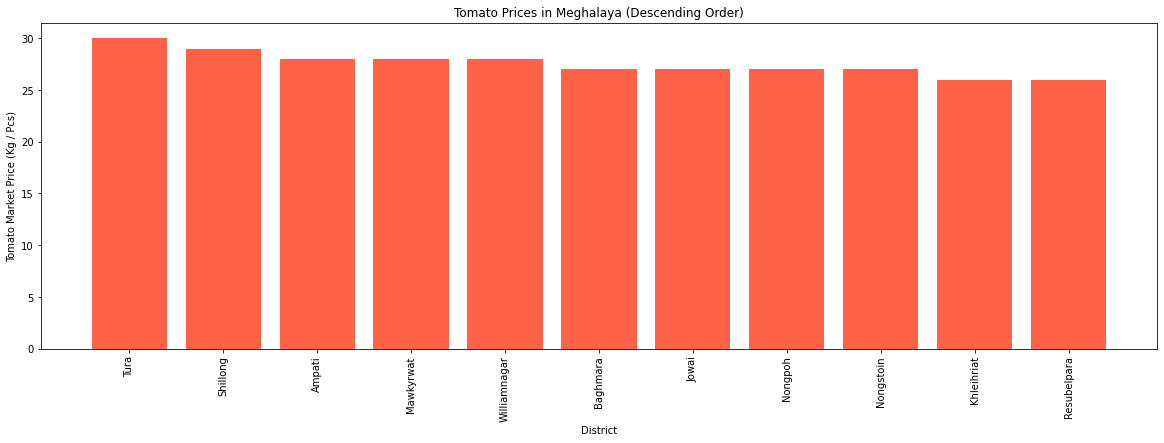

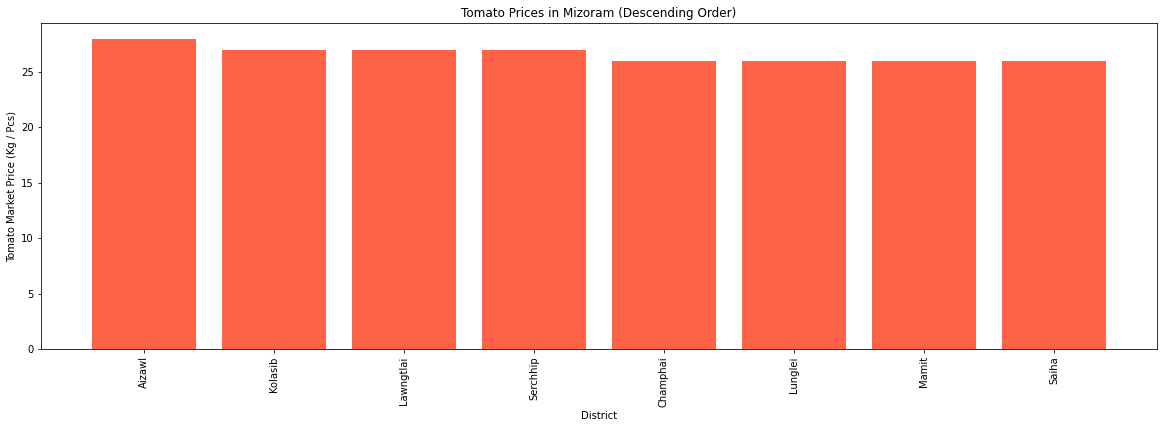

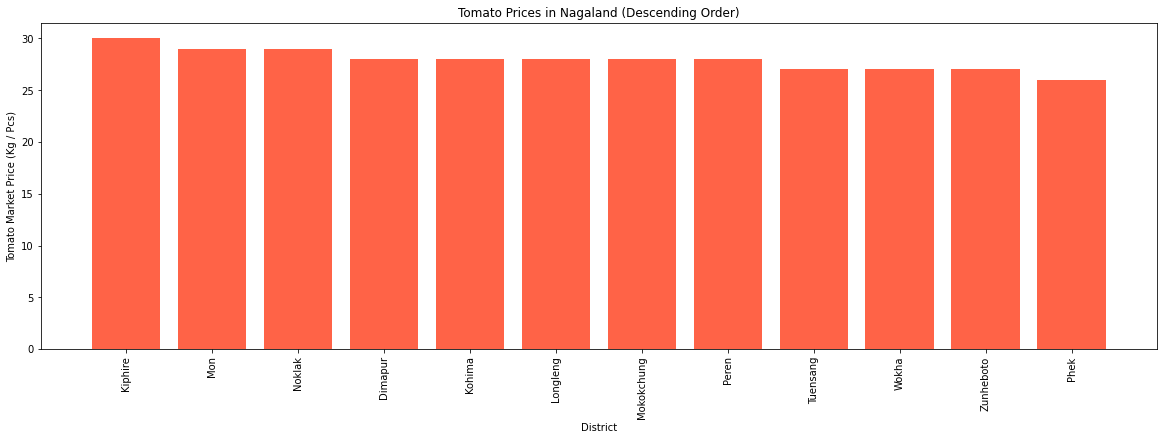

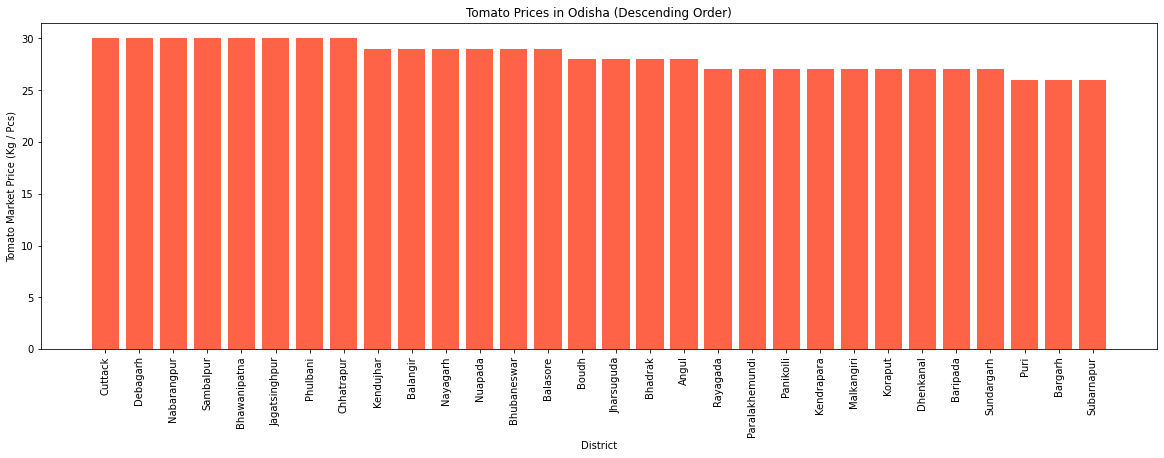

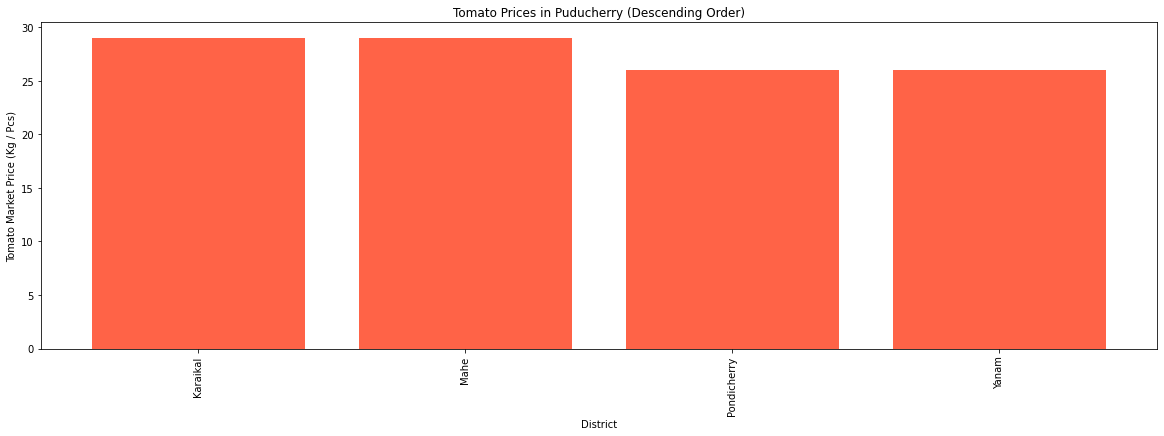

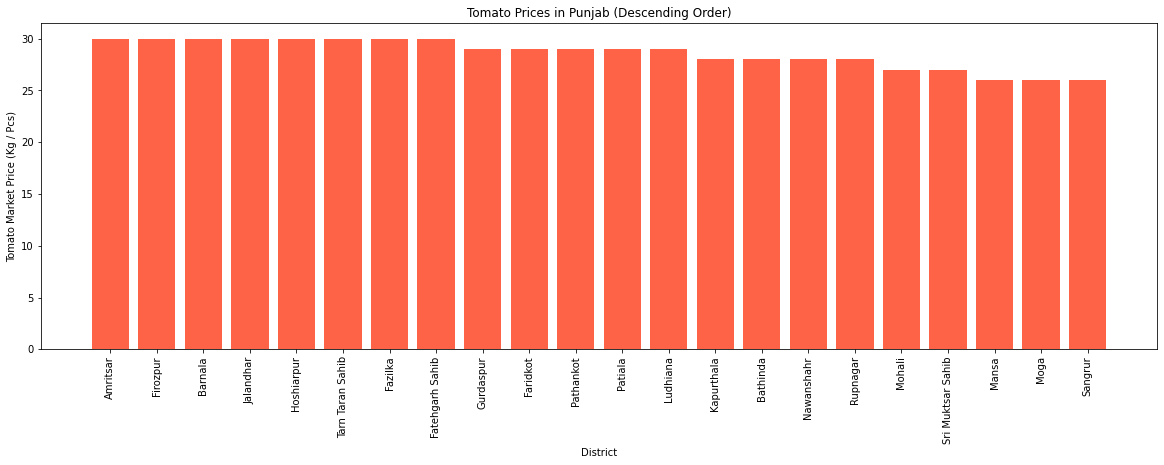

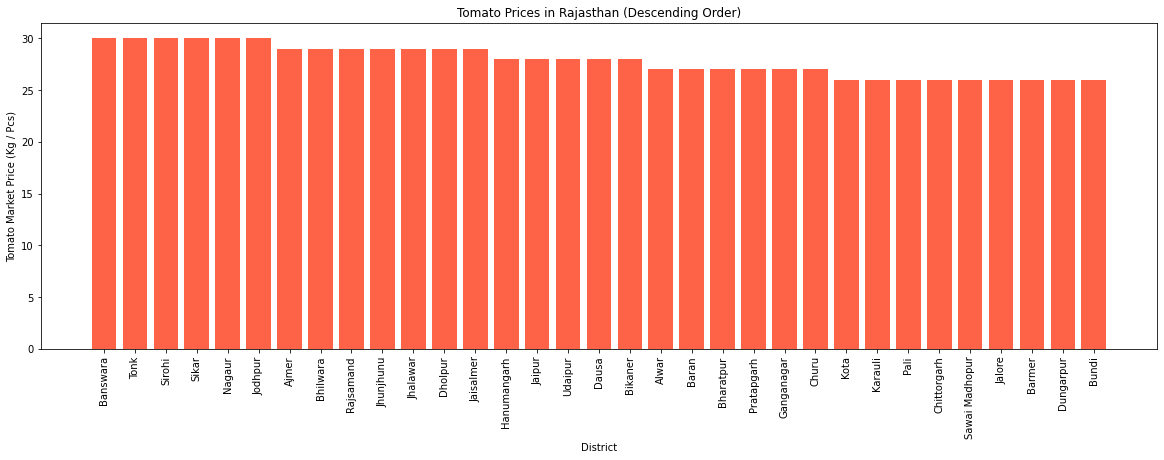

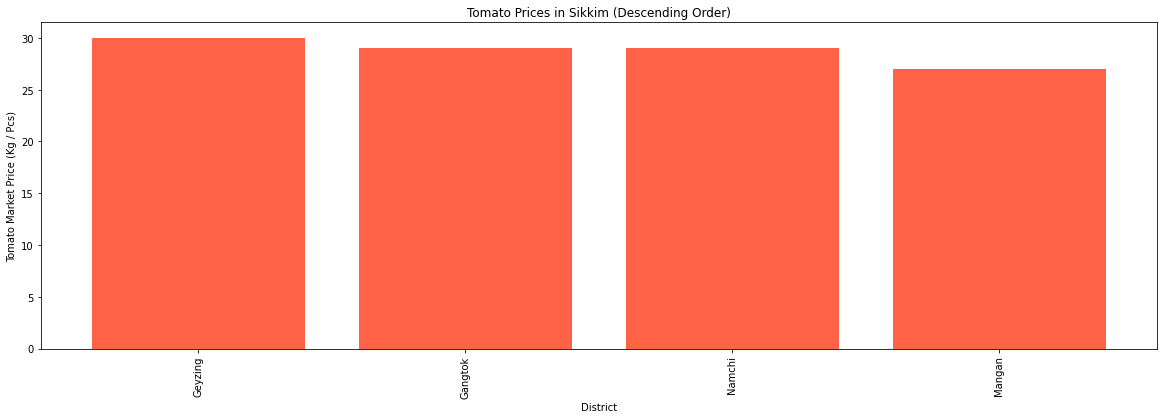

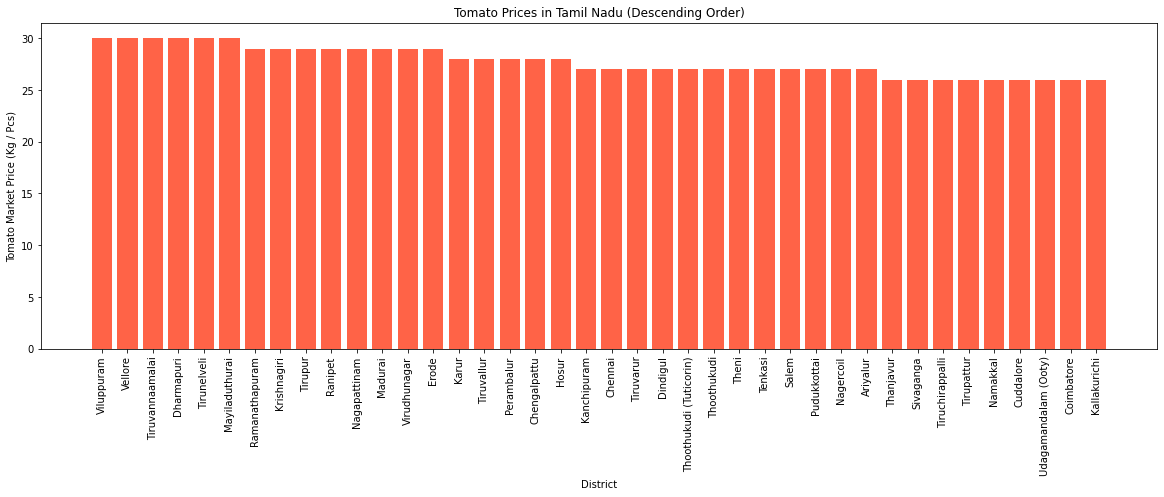

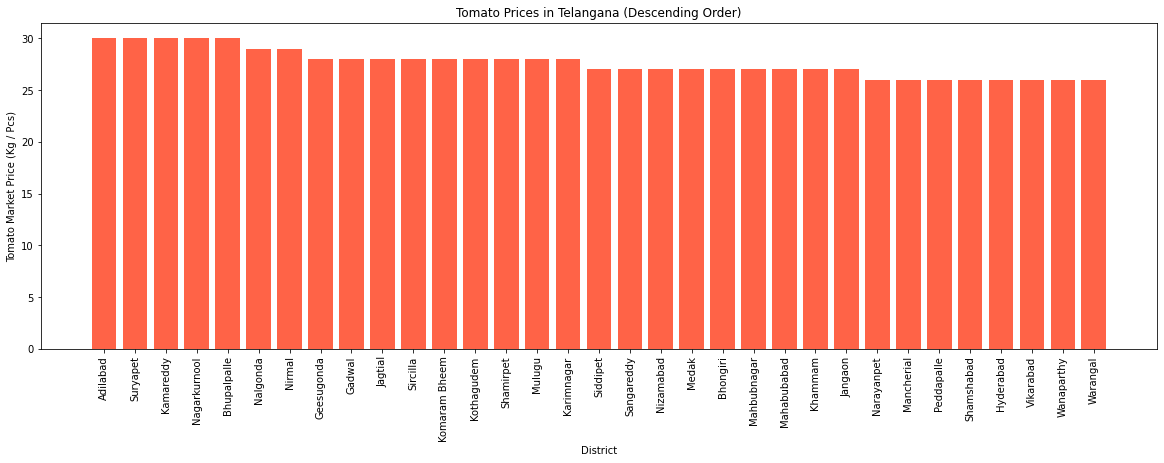

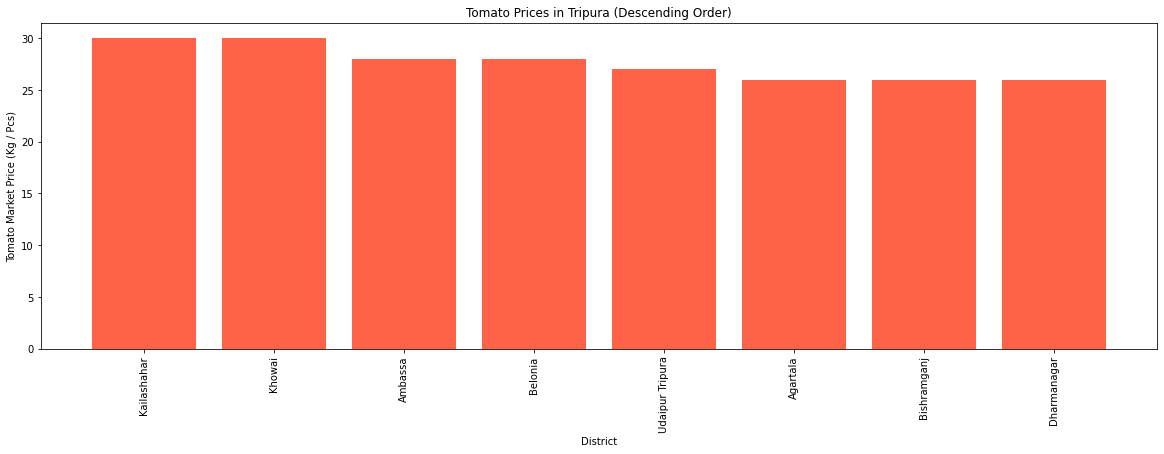

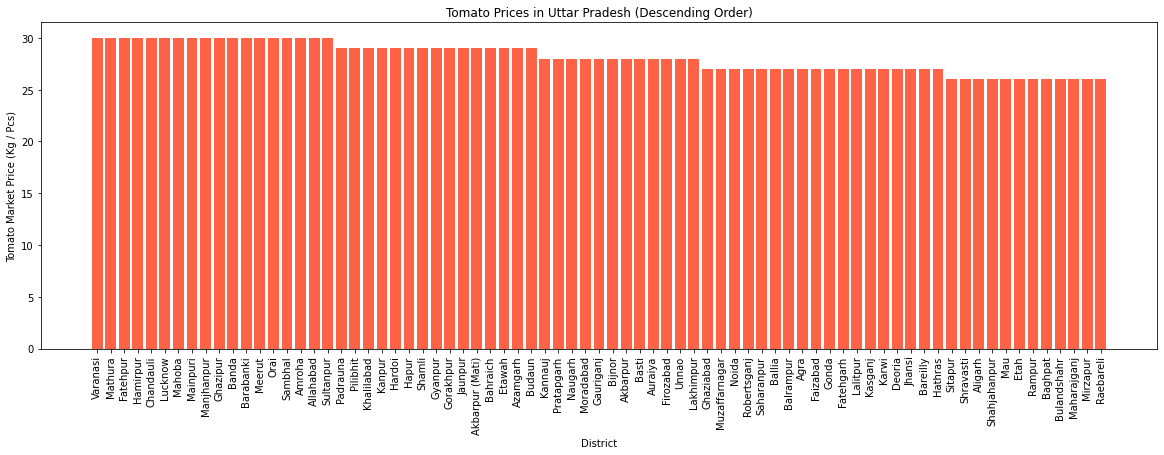

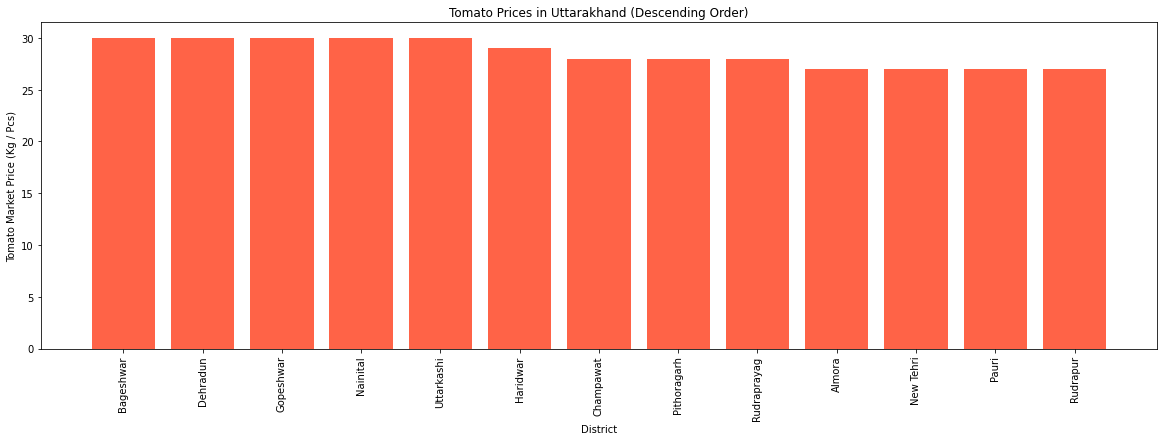

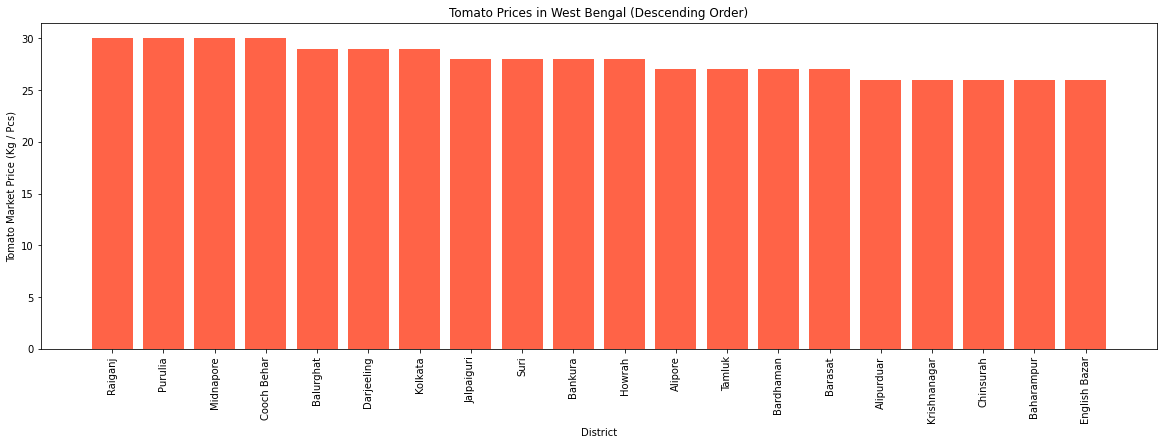

In [53]:
# Filter data for the "Tomato" vegetable in Tamil Nadu
# Get unique district names

states = veg_data['State'].unique()

for state in states:

    filtered_data = veg_data[(veg_data['State'] == state) & (veg_data['Vegetable Name'] == 'Tomato')]

    # Sort the data by the "Market Price" in descending order
    sorted_data = filtered_data.sort_values(by='Market Price', ascending=False)

    # Create a bar plot
    plt.figure(figsize=(20, 6))
    plt.bar(sorted_data['District'], sorted_data['Market Price'], color='tomato')
    plt.xlabel('District')
    plt.ylabel('Tomato Market Price (Kg / Pcs)')
    plt.title(f'Tomato Prices in {state} (Descending Order)')
    plt.xticks(rotation=90)
    plt.show()


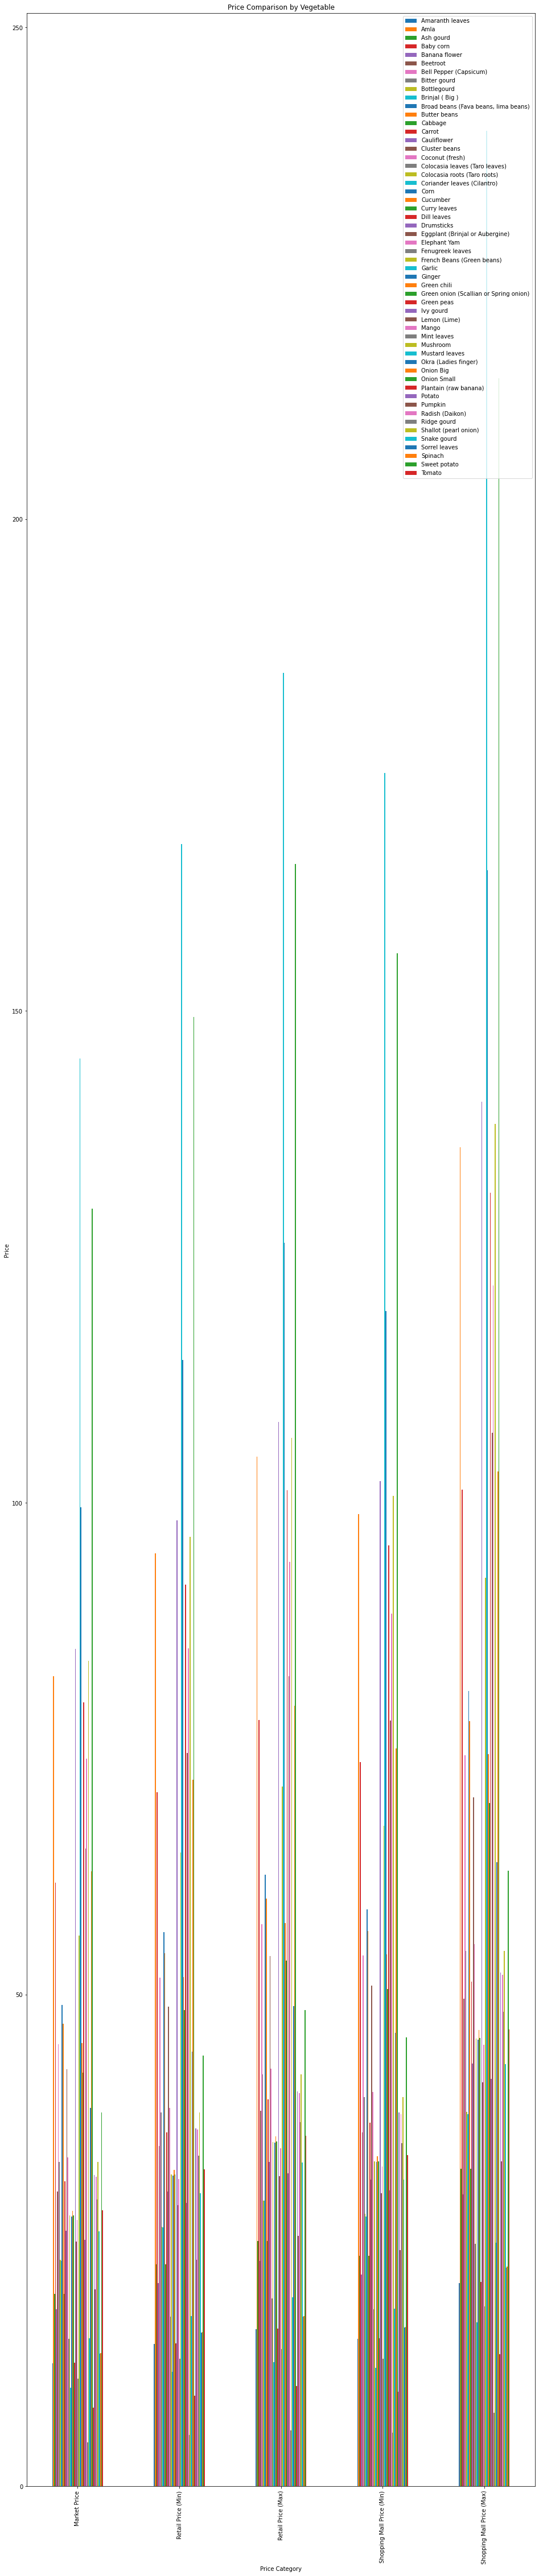

In [59]:
grouped = veg_data.groupby('Vegetable Name').agg({
    'Market Price': 'mean',
    'Retail Price (Min)': 'mean',
    'Retail Price (Max)': 'mean',
    'Shopping Mall Price (Min)': 'mean',
    'Shopping Mall Price (Max)': 'mean'
}).reset_index()

# Set the index to 'Vegetable Name'
grouped.set_index('Vegetable Name', inplace=True)

# Transpose the DataFrame for plotting
grouped = grouped.T

# Plot the grouped bar chart
grouped.plot(kind='bar', figsize=(16, 80))

# Set labels and title
plt.xlabel('Price Category')
plt.ylabel('Price')
plt.title('Price Comparison by Vegetable')

# Show the legend
plt.legend(loc='upper right')

# Show the plot
plt.show()